## WeGo Data Introduction

In [1]:
import pandas as pd

In [2]:
wego = pd.read_csv("../data/Headway Data, 8-1-2023 to 9-30-2023.csv")

wego

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,35.266666,5.266666,0,1,0,0,0.0,0,0.000000,NaN
350325,120230930,2,100406611,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,NaN,NaN,0,1,0,0,NaN,0,0.000000,NaN
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,...,31.866666,1.866666,0,0,1,0,0.0,0,0.000000,NaN
350327,120230930,2,100406613,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,...,47.500000,17.500000,0,1,0,0,0.0,0,0.000000,NaN


In [3]:
wego.columns

Index(['CALENDAR_ID', 'SERVICE_ABBR', 'ADHERENCE_ID', 'DATE', 'ROUTE_ABBR',
       'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'OVERLOAD_ID',
       'ROUTE_DIRECTION_NAME', 'TIME_POINT_ABBR', 'ROUTE_STOP_SEQUENCE',
       'TRIP_EDGE', 'LATITUDE', 'LONGITUDE', 'SCHEDULED_TIME',
       'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
       'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV', 'ADJUSTED_EARLY_COUNT',
       'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'STOP_CANCELLED',
       'PREV_SCHED_STOP_CANCELLED', 'IS_RELIEF', 'DWELL_IN_MINS',
       'SCHEDULED_LAYOVER_MINUTES'],
      dtype='object')

In the data, the bus route can be identified by its ROUTE_ABBR value.  
**3:** West End  
**7:** Hillsboro  
**22:** Bordeaux  
**23:** Dickerson Pike  
**50:** Charlotte Pike  
**52:** Nolensville Pike  
**55:** Murfreesboro Pike  
**56:** Gallatin Pike

In [4]:
wego['ROUTE_ABBR'].value_counts().sort_index()

ROUTE_ABBR
3     47162
7     18026
22    25959
23    42108
50    43291
52    51819
55    61944
56    60020
Name: count, dtype: int64

The trip can be identified by the DATE/CALENDAR_ID plus the TRIP_ID.  
**Warning:** The TRIP_ID refers to the route and time but will be used across multiple days.

The data contains multiple **time points** for each trip. There are more stops along the route than time points, but the time points are the points with specific scheduled times the bus operators must adhere to.

The first stop of a trip has a TRIP_EDGE of 1, the last has a TRIP_EDGE of 2, and the intermediate stops are TRIP_EDGE 0. 

Here is the first trip in the dataset. It was a Bordeaux route (Route 22), scheduled to start at 4:42:00 and end at 5:10:00.

In [5]:
wego[['DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR', 'TIME_POINT_ABBR', 'TRIP_EDGE', 'SCHEDULED_TIME']].loc[:3]

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME
0,2023-08-01,120230801,345104,22,MHSP,1,2023-08-01 04:42:00
1,2023-08-01,120230801,345104,22,ELIZ,0,2023-08-01 04:46:00
2,2023-08-01,120230801,345104,22,CV23,0,2023-08-01 04:54:00
3,2023-08-01,120230801,345104,22,MCC5_10,2,2023-08-01 05:10:00


Note that the same TRIP_ID appears on the following day.

In [6]:
(
    wego
    .loc[wego['DATE'].astype(str).isin(['2023-08-01', '2023-08-02'])]
    .loc[wego['TRIP_ID'] == 345104]
    [['DATE', 'ROUTE_ABBR', 'TRIP_ID', 'TIME_POINT_ABBR', 'TRIP_EDGE', 'ROUTE_DIRECTION_NAME', 'SCHEDULED_TIME', 'ROUTE_STOP_SEQUENCE']]
)

,DATE,ROUTE_ABBR,TRIP_ID,TIME_POINT_ABBR,TRIP_EDGE,ROUTE_DIRECTION_NAME,SCHEDULED_TIME,ROUTE_STOP_SEQUENCE
0,2023-08-01,22,345104,MHSP,1,TO DOWNTOWN,2023-08-01 04:42:00,14.0
1,2023-08-01,22,345104,ELIZ,0,TO DOWNTOWN,2023-08-01 04:46:00,10.0
2,2023-08-01,22,345104,CV23,0,TO DOWNTOWN,2023-08-01 04:54:00,5.0
3,2023-08-01,22,345104,MCC5_10,2,TO DOWNTOWN,2023-08-01 05:10:00,1.0
6461,2023-08-02,22,345104,MHSP,1,TO DOWNTOWN,2023-08-02 04:42:00,14.0
6462,2023-08-02,22,345104,ELIZ,0,TO DOWNTOWN,2023-08-02 04:46:00,10.0
6463,2023-08-02,22,345104,CV23,0,TO DOWNTOWN,2023-08-02 04:54:00,5.0
6464,2023-08-02,22,345104,MCC5_10,2,TO DOWNTOWN,2023-08-02 05:10:00,1.0


**Adherence** refers to the difference between scheduled time and the actual time that the bus departs from a stop.

A negative value for ADHERENCE indicates that the bus is late, and a positive indicates that the bus is early.

Generally, an adherence value less than -6 is considered late, and greater than 1 is considered early, but there are some exceptions. For example, a positive adherence for the end of a trip (TRIP_EDGE 2) is not considered early, since it is not a problem if a bus ends its trip early as long as it didn't pass other timepoints early along the way. You can check whether a trip was considered on-time, early, or late using the ADJUSTED_EARLY_COUNT, ADJUSTED_LATE_COUNT, and ADJUSTED_ONTIME_COUNT columns.

Here is an example of a trip where all time points would be considered to be on time. Notice that at the end of the trip, the bus was more than 6 minutes early, but was still counted as on-time since this was a trip edge of 2.

In [7]:
(
    wego
    [[
        'DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR',
        'TIME_POINT_ABBR', 'TRIP_EDGE',
        'SCHEDULED_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
        'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT'
    ]]
    .loc[:3]
)

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
0,2023-08-01,120230801,345104,22,MHSP,1,2023-08-01 04:42:00,2023-08-01 04:44:08,-2.133333,0,0,1
1,2023-08-01,120230801,345104,22,ELIZ,0,2023-08-01 04:46:00,2023-08-01 04:48:27,-2.450000,0,0,1
2,2023-08-01,120230801,345104,22,CV23,0,2023-08-01 04:54:00,2023-08-01 04:54:56,-0.933333,0,0,1
3,2023-08-01,120230801,345104,22,MCC5_10,2,2023-08-01 05:10:00,2023-08-01 05:03:43,6.283333,0,0,1


And one that has one late stop.

In [8]:
(
    wego
    [[
        'DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR',
        'TIME_POINT_ABBR', 'TRIP_EDGE',
        'SCHEDULED_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
        'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT'
    ]]
    .loc[77:79]
)

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
77,2023-08-01,120230801,345127,22,MHSP,1,2023-08-01 17:05:00,2023-08-01 17:08:21,-3.350000,0,0,1
78,2023-08-01,120230801,345127,22,CV23,0,2023-08-01 17:14:00,2023-08-01 17:20:10,-6.166666,0,1,0
79,2023-08-01,120230801,345127,22,MCC5_10,2,2023-08-01 17:30:00,2023-08-01 17:30:23,-0.383333,0,0,1


And one which was early.

In [9]:
(
    wego
    [[
        'DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR',
        'TIME_POINT_ABBR', 'TRIP_EDGE',
        'SCHEDULED_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
        'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT'
    ]]
    .loc[11:13]
)

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
11,2023-08-01,120230801,345107,22,MCC5_10,1,2023-08-01 06:15:00,2023-08-01 06:16:19,-1.316666,0,0,1
12,2023-08-01,120230801,345107,22,CV23,0,2023-08-01 06:25:00,2023-08-01 06:23:30,1.500000,1,0,0
13,2023-08-01,120230801,345107,22,MHSP,2,2023-08-01 06:35:00,2023-08-01 06:30:59,4.016666,0,0,1


**Headway** is the amount of time between a bus and the prior bus at the same stop. In the dataset, the amount of headway scheduled is contained in the SCHEDULED_HDWY column and indicates the difference between the scheduled time for a particular stop and the scheduled time for the previous bus on that same stop.

This dataset contains a column HDWY_DEV, which shows the amount of deviation from the scheduled headway. **Bunching** occurs when there is shorter headway than scheduled, which would appear as a negative HDWY_DEV value. **Gapping** is when there is more headway than scheduled and appears as a positive value in the HDWY_DEV column. Note that you can calculate headway deviation percentage as HDWY_DEV/SCHEDULED_HDWY. 

The generally accepted range of headway deviation is 50% to 150% of the scheduled headway, so if scheduled headway is 10 minutes, a headway deviation of up to 5 minutes would be acceptable (but not ideal).

In [10]:
(
    wego
    .loc[wego['ROUTE_ABBR'] == 22]
    .loc[wego['ROUTE_DIRECTION_NAME'] == 'TO DOWNTOWN']
    .loc[wego['TIME_POINT_ABBR'] == 'CV23']
    [['DATE', 'TRIP_ID', 'TIME_POINT_ABBR','ROUTE_DIRECTION_NAME', 'TRIP_EDGE', 
      'SCHEDULED_TIME', 'SCHEDULED_HDWY',
      'ACTUAL_DEPARTURE_TIME', 'ACTUAL_HDWY', 'HDWY_DEV'
     ]]
    .sort_values(['DATE', 'SCHEDULED_TIME'])
    .iloc[:5]
)

,DATE,TRIP_ID,TIME_POINT_ABBR,ROUTE_DIRECTION_NAME,TRIP_EDGE,SCHEDULED_TIME,SCHEDULED_HDWY,ACTUAL_DEPARTURE_TIME,ACTUAL_HDWY,HDWY_DEV
2,2023-08-01,345104,CV23,TO DOWNTOWN,0,2023-08-01 04:54:00,NaN,2023-08-01 04:54:56,NaN,NaN
126,2023-08-01,345213,CV23,TO DOWNTOWN,0,2023-08-01 05:19:00,25.0,2023-08-01 05:18:59,24.050000,-0.950000
402,2023-08-01,345405,CV23,TO DOWNTOWN,0,2023-08-01 05:39:00,20.0,2023-08-01 05:39:40,20.683333,0.683333
9,2023-08-01,345106,CV23,TO DOWNTOWN,0,2023-08-01 05:54:00,15.0,2023-08-01 05:54:11,14.516666,-0.483334
316,2023-08-01,345377,CV23,TO DOWNTOWN,0,2023-08-01 06:09:00,15.0,2023-08-01 06:10:01,15.833333,0.833333


Two other columns that you've been asked to explore are the DWELL_IN_MINS column and SCHEDULED_LAYOVER_MINUTES, which shows the difference between actual arrival and actual departure time at a time point and the time a bus was scheduled to arrive at the time point and when it is scheduled to leave at the beginning of a trip.

Here, we can see the end of the first trip in the dataset and the beginning of the next trip, which goes in the opposite direction.

In [11]:
wego.loc[3:4, ['DATE', 'TRIP_ID', 'TRIP_EDGE', 'TIME_POINT_ABBR',
               'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'DWELL_IN_MINS', 'SCHEDULED_LAYOVER_MINUTES']]

,DATE,TRIP_ID,TRIP_EDGE,TIME_POINT_ABBR,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
3,2023-08-01,345104,2,MCC5_10,2023-08-01 05:03:43,2023-08-01 05:03:43,0.000000,NaN
4,2023-08-01,345105,1,MCC5_10,2023-08-01 05:03:43,2023-08-01 05:16:35,12.866666,5.0


### 1. What is the overall on-time performance, and what do the overall distributions of adherence and headway deviation look like? 

In [12]:
pd.set_option('display.max_columns', None)

In [13]:
wego = wego[wego['PREV_SCHED_STOP_CANCELLED'] != 1]

wego = wego[wego['STOP_CANCELLED'] != 1]

wego = wego[wego['SCHEDULED_HDWY'] != 0]
wego =wego.dropna(subset=['ADHERENCE','ACTUAL_HDWY','SCHEDULED_HDWY'])
wego = wego[wego['SCHEDULED_HDWY'] != 2]

In [14]:
wego

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0
8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,0.000000,NaN
9,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0,14.516666,-0.483334,0,0,1,0,0.0,0,0.000000,NaN
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0
12,120230801,1,99457902,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 06:25:00,2023-08-01 06:23:30,2023-08-01 06:23:30,1.500000,15.0,11.116666,-3.883334,1,0,0,0,0.0,0,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350320,120230930,2,100406606,2023-09-30,7,702,2312,353447,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 21:45:00,2023-09-30 21:43:52,2023-09-30 21:50:54,-5.900000,30.0,36.716666,6.716666,0,0,1,0,0.0,0,7.033333,NaN
350323,120230930,2,100406609,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 22:16:00,2023-09-30 22:22:39,2023-09-30 22:24:37,-8.616666,30.0,34.916666,4.916666,0,1,0,0,0.0,0,1.966666,5.0
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 22:23:00,2023-09-30 22:31:26,2023-09-30 22:31:26,-8.433333,30.0,35.266666,5.266666,0,1,0,0,0.0,0,0.000000,NaN
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 22:45:00,2023-09-30 22:49:19,2023-09-30 22:49:19,-4.316666,30.0,31.866666,1.866666,0,0,1,0,0.0,0,0.000000,NaN


In [15]:
#df[df["col"] > 60]
#explore adherence and eliminate outliers more than 100 min early
wego[wego['ADHERENCE']< -100].sort_values('DATE')


,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
3247,120230801,1,99462285,2023-08-01,52,5204,1542,347287,0,FROM DOWNTOWN,MCC4_19,2.0,1,36.167091,-86.781923,2023-08-01 15:10:00,2023-08-01 17:06:18,2023-08-01 17:06:18,-116.300000,10.0,0.833333,-9.166667,0,1,0,0,0.0,0,0.000000,10.0
3248,120230801,1,99462286,2023-08-01,52,5204,1542,347287,0,FROM DOWNTOWN,NVFG,3.0,0,36.135034,-86.759818,2023-08-01 15:26:00,2023-08-01 17:38:02,2023-08-01 17:38:02,-132.033333,10.0,8.350000,-1.650000,0,1,0,0,0.0,0,0.000000,NaN
3249,120230801,1,99462287,2023-08-01,52,5204,1542,347287,0,FROM DOWNTOWN,THNV,4.0,0,36.111844,-86.745821,2023-08-01 15:33:00,2023-08-01 17:44:10,2023-08-01 17:46:08,-133.133333,10.0,5.283333,-4.716667,0,1,0,0,0.0,0,1.966666,NaN
3250,120230801,1,99462288,2023-08-01,52,5204,1542,347287,0,FROM DOWNTOWN,WMRT,5.0,0,36.082309,-86.727340,2023-08-01 15:45:00,2023-08-01 17:58:57,2023-08-01 17:58:57,-133.950000,10.0,4.300000,-5.700000,0,1,0,0,0.0,0,0.000000,NaN
3252,120230801,1,99462290,2023-08-01,52,5204,1542,347288,0,TO DOWNTOWN,HCKP,9.0,1,36.048934,-86.713854,2023-08-01 16:16:00,2023-08-01 18:09:12,2023-08-01 18:09:12,-113.200000,20.0,49.283333,29.283333,0,1,0,0,0.0,0,0.000000,19.0
24501,120230804,1,99565691,2023-08-04,56,5601,1603,352791,0,TO DOWNTOWN,GXFIVEPT,8.0,0,36.179753,-86.750216,2023-08-04 10:44:00,2023-08-04 12:43:50,2023-08-04 12:43:50,-119.833333,10.0,7.483333,-2.516667,0,1,0,0,0.0,0,0.000000,NaN
24499,120230804,1,99565689,2023-08-04,56,5601,1603,352791,0,TO DOWNTOWN,GXMADISO,10.0,0,36.257412,-86.714068,2023-08-04 10:26:00,2023-08-04 12:23:04,2023-08-04 12:23:04,-117.066666,10.0,6.683333,-3.316667,0,1,0,0,0.0,0,0.000000,NaN
22974,120230804,1,99564118,2023-08-04,52,5214,332,352272,0,FROM DOWNTOWN,MCC4_19,2.0,1,36.167091,-86.781923,2023-08-04 09:30:00,2023-08-04 09:16:10,2023-08-04 15:43:28,-373.466666,15.0,10.433333,-4.566667,0,1,0,0,0.0,0,387.300000,10.0
24500,120230804,1,99565690,2023-08-04,56,5601,1603,352791,0,TO DOWNTOWN,GXGRNFLD,9.0,0,36.210362,-86.733625,2023-08-04 10:36:00,2023-08-04 12:29:37,2023-08-04 12:32:48,-116.800000,10.0,5.566666,-4.433334,0,1,0,0,0.0,0,3.183333,NaN
19876,120230804,1,99559850,2023-08-04,23,2300,1893,350268,0,FROM DOWNTOWN,MCC4_24,2.0,1,36.167091,-86.781923,2023-08-04 06:00:00,2023-08-04 05:53:32,2023-08-04 10:43:52,-283.866666,20.0,14.500000,-5.500000,0,1,0,0,0.0,0,290.333333,6.0


In [16]:
wego[wego['ADHERENCE']< -100].sort_values('ADHERENCE')

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
103162,120230818,1,99963004,2023-08-18,52,5202,1052,352052,0,FROM DOWNTOWN,MCC4_19,2.0,1,36.167091,-86.781923,2023-08-18 06:15:00,2023-08-18 06:07:02,2023-08-18 22:03:32,-948.533333,15.0,30.583333,15.583333,0,1,0,0,0.0,0,956.500000,8.0
19788,120230804,1,99559760,2023-08-04,22,2211,1743,350239,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-04 07:00:00,2023-08-04 06:48:12,2023-08-04 18:15:00,-675.000000,15.0,8.233333,-6.766667,0,1,0,0,0.0,0,686.800000,5.0
340625,120230929,1,100377605,2023-09-29,23,2312,1394,350478,0,TO DOWNTOWN,DWMRT,5.0,1,36.244207,-86.760509,2023-09-29 05:37:00,2023-09-29 05:59:30,2023-09-29 15:55:10,-618.166666,12.0,13.683333,1.683333,0,1,0,0,0.0,0,595.666666,2.0
30377,120230806,3,99601907,2023-08-06,23,2311,2642,350455,0,TO DOWNTOWN,DWMRT,5.0,1,36.244207,-86.760509,2023-08-06 06:00:00,2023-08-06 06:26:26,2023-08-06 15:02:14,-542.233333,20.0,18.716666,-1.283334,0,1,0,0,0.0,0,515.800000,2.0
229460,120230910,3,100599172,2023-09-10,23,2311,2642,350455,0,TO DOWNTOWN,DWMRT,5.0,1,36.244207,-86.760509,2023-09-10 06:00:00,2023-09-10 06:26:36,2023-09-10 14:59:56,-539.933333,20.0,65.200000,45.200000,0,1,0,0,0.0,0,513.333333,2.0
229519,120230910,3,100599231,2023-09-10,23,2311,2764,350466,0,FROM DOWNTOWN,MCC4_24,2.0,1,36.167091,-86.781923,2023-09-10 15:00:00,2023-09-10 16:19:18,2023-09-10 22:46:22,-466.366666,25.0,31.333333,6.333333,0,1,0,0,0.0,1,387.066666,NaN
269889,120230917,3,100025761,2023-09-17,23,2311,2642,350456,0,FROM DOWNTOWN,MCC4_24,2.0,1,36.167091,-86.781923,2023-09-17 06:40:00,2023-09-17 06:29:18,2023-09-17 13:20:32,-400.533333,25.0,17.166666,-7.833334,0,1,0,0,0.0,0,411.233333,15.0
308795,120230923,2,100195713,2023-09-23,55,5505,2127,352574,0,FROM DOWNTOWN,MCC4_15,5.0,1,36.167091,-86.781923,2023-09-23 09:30:00,2023-09-23 09:16:18,2023-09-23 15:45:14,-375.233333,15.0,14.033333,-0.966667,0,1,0,0,0.0,0,388.933333,10.0
22974,120230804,1,99564118,2023-08-04,52,5214,332,352272,0,FROM DOWNTOWN,MCC4_19,2.0,1,36.167091,-86.781923,2023-08-04 09:30:00,2023-08-04 09:16:10,2023-08-04 15:43:28,-373.466666,15.0,10.433333,-4.566667,0,1,0,0,0.0,0,387.300000,10.0
68208,120230812,2,99782189,2023-08-12,52,5201,2352,352030,0,FROM DOWNTOWN,MCC4_19,2.0,1,36.167091,-86.781923,2023-08-12 18:15:00,2023-08-13 18:00:26,2023-08-13 00:21:56,-366.933333,20.0,18.833333,-1.166667,0,1,0,0,0.0,0,381.500000,NaN


In [17]:
#review of the adherence column
wego['ADHERENCE'].describe()

count    261581.000000
mean         -3.445064
std           6.227804
min        -948.533333
25%          -4.600000
50%          -2.200000
75%          -0.666666
max          85.666666
Name: ADHERENCE, dtype: float64

In [18]:
#identify adherenence for buses no more than an hour late or early
wego_hour_range = wego[wego['ADHERENCE'].between(-60, 60)]

In [19]:
#eliminated about 300 stops
wego_hour_range['ADHERENCE'].describe()

count    261412.000000
mean         -3.384132
std           4.630264
min         -59.816666
25%          -4.600000
50%          -2.200000
75%          -0.666666
max          34.333333
Name: ADHERENCE, dtype: float64

In [20]:
from matplotlib import pyplot as plt

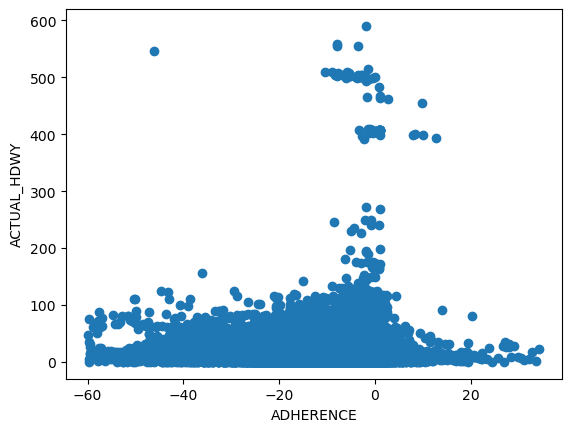

In [21]:
#create a scatter to show the incidence of adherance and the actual headway for buses within that hour early/late range
plt.scatter(wego_hour_range['ADHERENCE'], wego_hour_range['ACTUAL_HDWY'])
plt.ylabel('ACTUAL_HDWY')
plt.xlabel('ADHERENCE')
plt.show()


In [22]:
wego_on_time= wego_hour_range['ADJUSTED_ONTIME_COUNT'].sum()

In [23]:
wego_on_time

208330

In [24]:
wego_late = wego_hour_range['ADJUSTED_LATE_COUNT'].sum()

In [25]:
wego_early = wego_hour_range['ADJUSTED_EARLY_COUNT'].sum()

In [26]:
wego_late

44455

In [27]:
wego_early

8627

In [28]:
wego_all= wego_late + wego_early + wego_on_time
wego_all

261412

In [29]:
wego_timely_pct= wego_on_time/wego_all *100

In [30]:
wego_timely_pct.round(2)

79.69

In [31]:
wego_late_pct = wego_late/wego_all *100

In [32]:
wego_late_pct.round(2)

17.01

In [33]:
wego_early_pct = wego_early/wego_all *100

In [34]:
wego_early_pct.round(2)

3.3

Text(0.5, 1.0, 'Overall On-Time Performance')

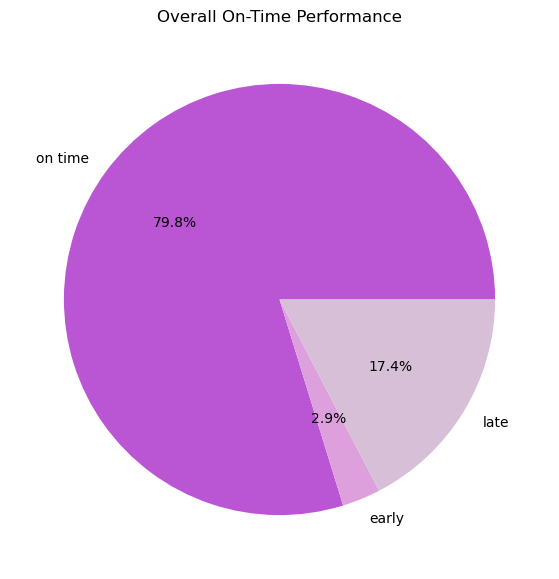

In [35]:
# from matplotlib import pyplot as plt
import numpy as np
# # Creating dataset
# cars = ['AUDI', 'BMW', 'FORD',
# 'TESLA', 'JAGUAR', 'MERCEDES']
# data = [23, 17, 35, 29, 12, 41]
# # Creating plot
# fig = plt.figure(figsize=(10, 7))
# plt.pie(data, labels=cars)
pieces = ['on time','early', 'late']
data= [79.77, 2.88, 17.35]
fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels = pieces, autopct='%1.1f%%', colors=("mediumorchid","plum", "thistle"))
plt.title('Overall On-Time Performance')


### 2. How does direction of travel, route, or location affect the headway and on-time performance?

In [36]:
# (
# wego_hour_range
#     .loc[wego_hour_range['ROUTE_DIRECTION_NAME'] == 'TO DOWNTOWN']
#     [['DATE', 'TRIP_ID', 'TIME_POINT_ABBR','ROUTE_DIRECTION_NAME', 'TRIP_EDGE', 
#       'SCHEDULED_TIME', 'SCHEDULED_HDWY',
#       'ACTUAL_DEPARTURE_TIME', 'ACTUAL_HDWY', 'HDWY_DEV'
#      ]]
#     .value_counts('ADJUSTED_ONTIME_COUNT')
# )

#filter on travel 

wego_todt_ontime = wego_hour_range.loc[wego_hour_range['ROUTE_DIRECTION_NAME'] == 'TO DOWNTOWN'].loc[wego_hour_range['ADJUSTED_ONTIME_COUNT'] == 1].sort_values('HDWY_DEV', ascending=False)


In [37]:
wego['HDWY_PCT']= wego['ACTUAL_HDWY']/wego['SCHEDULED_HDWY']*100
wego

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,HDWY_PCT
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0,107.619046
8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,0.000000,NaN,105.619046
9,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0,14.516666,-0.483334,0,0,1,0,0.0,0,0.000000,NaN,96.777773
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0,85.555553
12,120230801,1,99457902,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 06:25:00,2023-08-01 06:23:30,2023-08-01 06:23:30,1.500000,15.0,11.116666,-3.883334,1,0,0,0,0.0,0,0.000000,NaN,74.111107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350320,120230930,2,100406606,2023-09-30,7,702,2312,353447,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 21:45:00,2023-09-30 21:43:52,2023-09-30 21:50:54,-5.900000,30.0,36.716666,6.716666,0,0,1,0,0.0,0,7.033333,NaN,122.388887
350323,120230930,2,100406609,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 22:16:00,2023-09-30 22:22:39,2023-09-30 22:24:37,-8.616666,30.0,34.916666,4.916666,0,1,0,0,0.0,0,1.966666,5.0,116.388887
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 22:23:00,2023-09-30 22:31:26,2023-09-30 22:31:26,-8.433333,30.0,35.266666,5.266666,0,1,0,0,0.0,0,0.000000,NaN,117.555553
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 22:45:00,2023-09-30 22:49:19,2023-09-30 22:49:19,-4.316666,30.0,31.866666,1.866666,0,0,1,0,0.0,0,0.000000,NaN,106.222220


In [38]:
bunching = wego['bunching'] = wego['HDWY_PCT'] < 50
gapping = wego['gapping'] = wego['HDWY_PCT'] > 150


In [39]:
acceptable_range = wego['acceptable_range'] = (wego['HDWY_PCT'] >= 50) & (wego['HDWY_PCT'] <= 150)
hdwy_range = [bunching, gapping, acceptable_range]
range_names = ['Bunching', 'Gapping', 'Acceptable Range']


In [40]:
wego['bunching'] = wego['HDWY_PCT'] < 50
wego['gapping'] = wego['HDWY_PCT'] > 150
wego['acceptable_range'] = (wego['HDWY_PCT'] >= 50) & (wego['HDWY_PCT'] <= 150)
wego['hdwy_range_status'] = np.select(hdwy_range, range_names, default = 'Unknown')
range_counts = wego['hdwy_range_status'].value_counts()
range_counts

hdwy_range_status
Acceptable Range    223417
Gapping              20664
Bunching             17500
Name: count, dtype: int64

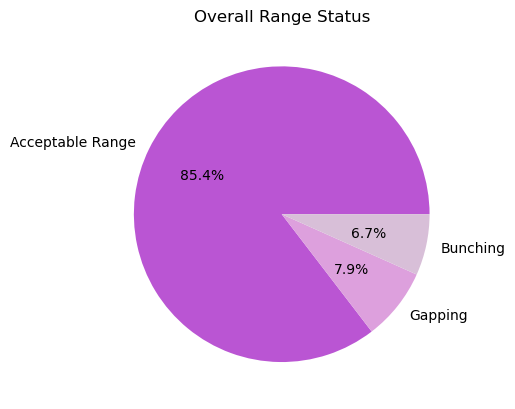

In [41]:
pieces=['Acceptable Range', 'Gapping', 'Bunching']
plt.pie(range_counts, labels=pieces, autopct='%1.1f%%', colors=("mediumorchid","plum", "thistle"))
plt.title('Overall Range Status')

plt.show()

In [47]:
import seaborn as sns

In [44]:
wego_avg_route = wego.groupby(['ROUTE_ABBR', 'ROUTE_DIRECTION_NAME']).agg(avg_adherence = ('ADHERENCE', 'mean'), avg_hdwy_perc = ('HDWY_PCT','mean'), avg_on_time = ('ADJUSTED_ONTIME_COUNT', 'mean')).reset_index()
wego_avg_route

,ROUTE_ABBR,ROUTE_DIRECTION_NAME,avg_adherence,avg_hdwy_perc,avg_on_time
0,3,FROM DOWNTOWN,-4.724163,102.510900,0.690646
1,3,TO DOWNTOWN,-2.706954,102.463331,0.849522
2,7,FROM DOWNTOWN,-3.994180,102.050302,0.743877
3,7,TO DOWNTOWN,-2.719629,101.784079,0.859721
4,22,FROM DOWNTOWN,-2.595297,104.105739,0.860251
5,22,TO DOWNTOWN,-1.414075,102.612516,0.914551
6,23,FROM DOWNTOWN,-2.561662,104.886387,0.875256
7,23,TO DOWNTOWN,-1.995938,104.896073,0.893499
8,50,FROM DOWNTOWN,-3.152613,100.874078,0.833372
9,50,TO DOWNTOWN,-2.514888,100.822604,0.863838


In [45]:
route_id = {
    '3': 'West End',
    '7': 'Hillsboro',
    '22': 'Bordeaux',
    '23': 'Dickerson Pike',
    '50': 'Charlotte Pike',
    '52': 'Nolensville Pike',
    '55': 'Murfreesboro Pike',
    '56': 'Gallatin Pike'
}
wego_avg_route['ROUTE_ABBR'] = wego_avg_route['ROUTE_ABBR'].astype(str).replace(route_id)
wego_avg_route

,ROUTE_ABBR,ROUTE_DIRECTION_NAME,avg_adherence,avg_hdwy_perc,avg_on_time
0,West End,FROM DOWNTOWN,-4.724163,102.510900,0.690646
1,West End,TO DOWNTOWN,-2.706954,102.463331,0.849522
2,Hillsboro,FROM DOWNTOWN,-3.994180,102.050302,0.743877
3,Hillsboro,TO DOWNTOWN,-2.719629,101.784079,0.859721
4,Bordeaux,FROM DOWNTOWN,-2.595297,104.105739,0.860251
5,Bordeaux,TO DOWNTOWN,-1.414075,102.612516,0.914551
6,Dickerson Pike,FROM DOWNTOWN,-2.561662,104.886387,0.875256
7,Dickerson Pike,TO DOWNTOWN,-1.995938,104.896073,0.893499
8,Charlotte Pike,FROM DOWNTOWN,-3.152613,100.874078,0.833372
9,Charlotte Pike,TO DOWNTOWN,-2.514888,100.822604,0.863838


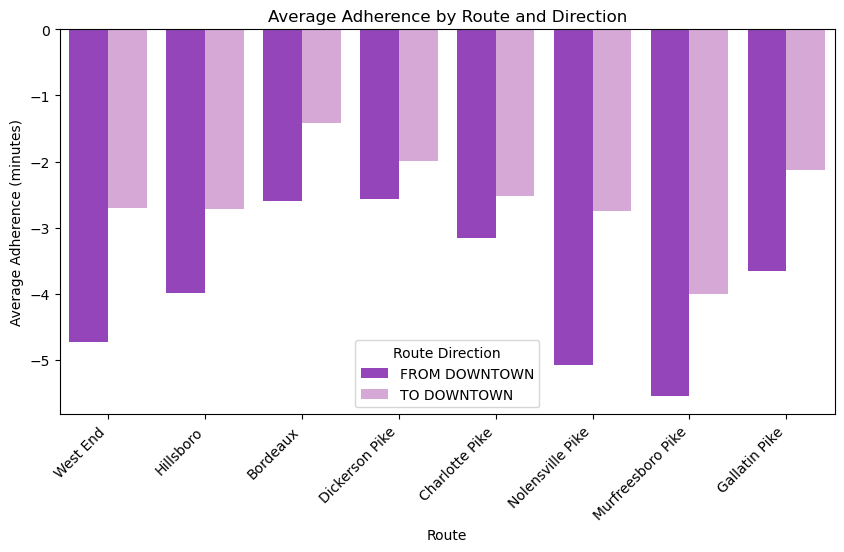

In [48]:
downtown_colors = {"FROM DOWNTOWN": "darkorchid", "TO DOWNTOWN": "plum"}
#wego_avg_route["Route"]= wego_avg_route['ROUTE_ABBR']
plt.figure(figsize = (10, 5))
sns.barplot(data = wego_avg_route, x = 'ROUTE_ABBR' , y ='avg_adherence', hue ='ROUTE_DIRECTION_NAME', palette= downtown_colors)
plt.xticks(rotation=45, ha="right")
plt.title('Average Adherence by Route and Direction')
plt.xlabel("Route")
plt.ylabel('Average Adherence (minutes)')
plt.legend(title ='Route Direction')

# ax.set(xlabel='Route',
#        ylabel= 'Average Adherence (minutes)',
#        title='Average Adherence by Route and Direction')



In [ ]:
route_id = {
    '3': 'West End',
    '7': 'Hillsboro',
    '22': 'Bordeaux',
    '23': 'Dickerson Pike',
    '50': 'Charlotte Pike',
    '52': 'Nolensville Pike',
    '55': 'Murfreesboro Pike',
    '56': 'Gallatin Pike'
}
wego_avg_route['ROUTE_ABBR'] = wego_avg_route['ROUTE_ABBR'].astype(str).replace(route_id)

### TO Downtown on time per Adjusted OnTime Count

In [49]:
#buses going toward downtown what were on time
wego_todt_ontime

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
124778,120230822,1,100070737,2023-08-22,52,5218,2584,352309,0,TO DOWNTOWN,DCSCC,8.0,1,36.086817,-86.686874,2023-08-22 16:02:00,2023-08-22 15:30:45,2023-08-22 16:03:24,-1.400000,42.0,514.366666,472.366666,0,0,1,0,0.0,0,32.650000,NaN
262673,120230915,1,99982167,2023-09-15,52,5217,1394,352307,0,TO DOWNTOWN,DCSCC,8.0,1,36.086817,-86.686874,2023-09-15 15:20:00,2023-09-15 14:14:37,2023-09-15 15:19:02,0.966666,63.0,468.133333,405.133333,0,0,1,0,0.0,0,64.416666,NaN
70364,120230813,3,99799282,2023-08-13,22,2200,2793,350040,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-13 21:46:00,2023-08-13 21:36:20,2023-08-13 21:45:02,0.966666,30.0,268.983333,238.983333,0,0,1,0,0.0,0,8.700000,8.0
180973,120230901,1,100358403,2023-09-01,22,2200,2832,349970,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-09-01 23:43:00,2023-09-01 23:43:47,2023-09-01 23:43:47,-0.783333,60.0,249.750000,189.750000,0,0,1,0,0.0,0,0.000000,NaN
224,120230801,1,99458118,2023-08-01,22,2202,1190,345297,0,TO DOWNTOWN,CLFF,9.0,1,36.192856,-86.828554,2023-08-01 09:45:00,2023-08-01 09:37:14,2023-08-01 09:49:58,-4.966666,45.0,229.833333,184.833333,0,0,1,0,0.0,0,12.733333,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189703,120230902,2,100390873,2023-09-02,52,5211,2706,352195,0,TO DOWNTOWN,LINWAL,6.0,0,36.083418,-86.704722,2023-09-02 17:47:00,2023-09-02 17:49:48,2023-09-02 17:49:48,-2.800000,41.0,10.400000,-30.600000,0,0,1,0,0.0,0,0.000000,NaN
299321,120230922,1,100145222,2023-09-22,22,2200,2374,349958,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-09-22 17:05:00,2023-09-22 16:50:27,2023-09-22 17:04:03,0.950000,50.0,17.133333,-32.866667,0,0,1,0,0.0,0,13.600000,15.0
108931,120230819,2,99991422,2023-08-19,52,5211,2706,352199,0,TO DOWNTOWN,LINWAL,6.0,0,36.083418,-86.704722,2023-08-19 21:59:00,2023-08-19 22:00:59,2023-08-19 22:00:59,-1.983333,60.0,22.850000,-37.150000,0,0,1,0,0.0,0,0.000000,NaN
108917,120230819,2,99991408,2023-08-19,52,5211,2706,352197,0,TO DOWNTOWN,HDANT,7.0,1,36.087288,-86.692935,2023-08-19 19:55:00,2023-08-19 19:32:25,2023-08-19 19:56:23,-1.383333,51.0,11.900000,-39.100000,0,0,1,0,0.0,0,23.966666,28.0


In [50]:
wego_todt_ontime.describe()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
count,1.035250e+05,103525.000000,1.035250e+05,103525.00000,103525.000000,103525.000000,103525.000000,103525.000000,103525.000000,103525.000000,103525.000000,103525.000000,103525.000000,103525.000000,103525.000000,103525.000000,103525.0,103525.0,103525.0,103525.0,103525.0,103525.000000,103525.000000,24271.000000
mean,1.202309e+08,1.295542,1.001033e+08,38.76143,3886.381570,1890.985569,351625.759266,0.001719,7.975088,0.275122,36.149247,-86.770926,-1.811719,18.741299,18.657073,-0.084227,0.0,0.0,1.0,0.0,0.0,0.000251,4.740265,16.081414
std,5.057719e+01,0.631064,3.238705e+05,20.53319,2052.917714,775.401637,1470.989282,0.050661,3.888077,0.446578,0.061294,0.074847,1.701830,11.979758,13.318956,5.314913,0.0,0.0,0.0,0.0,0.0,0.015846,8.857603,7.482795
min,1.202308e+08,1.000000,9.945790e+07,3.00000,300.000000,235.000000,345106.000000,0.000000,3.000000,0.000000,36.048934,-86.955657,-6.000000,5.000000,0.000000,-39.250000,0.0,0.0,1.0,0.0,0.0,0.000000,-0.766666,0.000000
25%,1.202308e+08,1.000000,9.986367e+07,22.00000,2211.000000,1361.000000,351025.000000,0.000000,5.000000,0.000000,36.107575,-86.816998,-2.966666,10.000000,11.183333,-1.983334,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,11.000000
50%,1.202308e+08,1.000000,1.001346e+08,52.00000,5200.000000,1914.000000,351997.000000,0.000000,8.000000,0.000000,36.143233,-86.760509,-1.516666,15.000000,15.933333,-0.100000,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,16.000000
75%,1.202309e+08,1.000000,1.003479e+08,55.00000,5505.000000,2545.000000,352639.000000,0.000000,10.000000,1.000000,36.181248,-86.714068,-0.466666,21.000000,22.816666,1.583333,0.0,0.0,1.0,0.0,0.0,0.000000,4.533333,20.000000
max,1.202309e+08,3.000000,1.007010e+08,56.00000,9950.000000,3173.000000,354098.000000,3.000000,17.000000,1.000000,36.300470,-86.636862,1.000000,407.000000,514.366666,472.366666,0.0,0.0,1.0,0.0,0.0,1.000000,262.900000,61.000000


In [51]:
wego_todt_timely = wego_hour_range.loc[wego_hour_range['ROUTE_DIRECTION_NAME'] == 'TO DOWNTOWN'].loc[wego_hour_range['ADJUSTED_ONTIME_COUNT'] == 1][['DATE', 'TRIP_ID', 'ROUTE_ABBR','ROUTE_DIRECTION_NAME', 'TRIP_EDGE', 
      'ADHERENCE','ACTUAL_HDWY','SCHEDULED_HDWY','HDWY_DEV']]  

In [52]:
wego_todt_timely=wego_todt_timely.dropna(subset=['ADHERENCE','ACTUAL_HDWY','SCHEDULED_HDWY'])

wego = wego[wego['PREV_SCHED_STOP_CANCELLED'] != 1]

wego = wego[wego['STOP_CANCELLED'] != 1]

wego = wego[wego['SCHEDULED_HDWY'] != 0]

In [53]:
wego_todt_timely[['DATE', 'TRIP_ID', 'ROUTE_ABBR','ROUTE_DIRECTION_NAME', 'TRIP_EDGE', 
      'ACTUAL_HDWY', 'HDWY_DEV']]

,DATE,TRIP_ID,ROUTE_ABBR,ROUTE_DIRECTION_NAME,TRIP_EDGE,ACTUAL_HDWY,HDWY_DEV
7,2023-08-01,345106,22,TO DOWNTOWN,1,37.666666,2.666666
8,2023-08-01,345106,22,TO DOWNTOWN,0,36.966666,1.966666
9,2023-08-01,345106,22,TO DOWNTOWN,0,14.516666,-0.483334
14,2023-08-01,345108,22,TO DOWNTOWN,1,59.800000,-0.200000
15,2023-08-01,345108,22,TO DOWNTOWN,0,60.083333,0.083333
...,...,...,...,...,...,...,...
350299,2023-09-30,353440,7,TO DOWNTOWN,1,32.400000,2.400000
350305,2023-09-30,353442,7,TO DOWNTOWN,1,29.800000,-0.200000
350306,2023-09-30,353442,7,TO DOWNTOWN,0,30.966666,0.966666
350311,2023-09-30,353444,7,TO DOWNTOWN,1,30.433333,0.433333


In [174]:
route_id = {
    '3': 'West End',
    '7': 'Hillsboro',
    '22': 'Bordeaux',
    '23': 'Dickerson Pike',
    '50': 'Charlotte Pike',
    '52': 'Nolensville Pike',
    '55': 'Murfreesboro Pike',
    '56': 'Gallatin Pike'
}
wego_todt_timely['ROUTE_ABBR'] = wego_todt_timely['ROUTE_ABBR'].astype(str).replace(route_id)

In [54]:
def BUNCH_GAP(wego_todt_timely):
    if wego_todt_timely['HDWY_DEV'] < 0:
        return "Bunching"
    elif wego_todt_timely['HDWY_DEV'] > 0:
        return "Gapping"
    else:
        return np.NaN

In [55]:
wego_todt_timely['BUNCH_GAP'] = wego_todt_timely.apply(BUNCH_GAP, axis=1)

In [56]:

wego_todt_timely['Bunching']= wego_todt_timely['HDWY_DEV'] < 0
wego_todt_timely['Gapping']= wego_todt_timely['HDWY_DEV'] > 0

In [57]:
wego_todt_timely['HDWY_PCT']= wego_todt_timely['ACTUAL_HDWY']/wego_todt_timely['SCHEDULED_HDWY']*100

In [58]:
wego_todt_timely['Acceptable']= wego_todt_timely['HDWY_PCT'].between(50, 150)



In [175]:
wego_todt_timely[['DATE', 'TRIP_ID', 'ROUTE_ABBR','ROUTE_DIRECTION_NAME', 'TRIP_EDGE', 
      'ACTUAL_HDWY', 'HDWY_DEV','HDWY_PCT','BUNCH_GAP','Bunching','Gapping', 'Acceptable']]

,DATE,TRIP_ID,ROUTE_ABBR,ROUTE_DIRECTION_NAME,TRIP_EDGE,ACTUAL_HDWY,HDWY_DEV,HDWY_PCT,BUNCH_GAP,Bunching,Gapping,Acceptable
7,2023-08-01,345106,Bordeaux,TO DOWNTOWN,1,37.666666,2.666666,107.619046,Gapping,False,True,True
8,2023-08-01,345106,Bordeaux,TO DOWNTOWN,0,36.966666,1.966666,105.619046,Gapping,False,True,True
9,2023-08-01,345106,Bordeaux,TO DOWNTOWN,0,14.516666,-0.483334,96.777773,Bunching,True,False,True
14,2023-08-01,345108,Bordeaux,TO DOWNTOWN,1,59.800000,-0.200000,99.666667,Bunching,True,False,True
15,2023-08-01,345108,Bordeaux,TO DOWNTOWN,0,60.083333,0.083333,100.138888,Gapping,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
350299,2023-09-30,353440,Hillsboro,TO DOWNTOWN,1,32.400000,2.400000,108.000000,Gapping,False,True,True
350305,2023-09-30,353442,Hillsboro,TO DOWNTOWN,1,29.800000,-0.200000,99.333333,Bunching,True,False,True
350306,2023-09-30,353442,Hillsboro,TO DOWNTOWN,0,30.966666,0.966666,103.222220,Gapping,False,True,True
350311,2023-09-30,353444,Hillsboro,TO DOWNTOWN,1,30.433333,0.433333,101.444443,Gapping,False,True,True


In [60]:
#sns.barplot(data=df, x='day', y='tip', hue='sex')
#plt.show()
import seaborn as sns
# sns.barplot(x = 'who',
#             y = 'fare',
#             data = df)
 
# # Show the plot
# plt.show()

In [176]:
#df.groupby(['cluster']).mean()
todt_timely_rts= wego_todt_timely.groupby(["ROUTE_ABBR"]).mean('HDWY_PCT')
todt_timely_rts


,TRIP_ID,TRIP_EDGE,ADHERENCE,ACTUAL_HDWY,SCHEDULED_HDWY,HDWY_DEV,Bunching,Gapping,HDWY_PCT,Acceptable
ROUTE_ABBR,,,,,,,,,,
Bordeaux,349836.137056,0.419258,-1.155216,30.911963,30.341688,0.570275,0.482709,0.502379,101.651515,0.967798
Charlotte Pike,351526.396460,0.216202,-1.841302,19.139777,19.565705,-0.425928,0.532734,0.464225,97.672389,0.970475
Dickerson Pike,350105.910894,0.355070,-1.623689,17.180461,16.434598,0.745864,0.484423,0.511029,104.206795,0.934694
Gallatin Pike,352677.289025,0.271483,-1.685940,13.788695,13.995555,-0.206860,0.511141,0.485244,98.701304,0.932915
Hillsboro,353120.859671,0.529835,-1.830672,22.581135,22.932305,-0.351170,0.534979,0.460288,98.496191,0.962346
Murfreesboro Pike,352254.917716,0.245031,-2.152136,13.043710,13.713291,-0.669580,0.549365,0.447849,95.228879,0.864788
Nolensville Pike,351877.240500,0.221716,-1.723778,21.800900,21.672969,0.127931,0.508838,0.487960,99.804610,0.926156
West End,350824.522530,0.235595,-1.989619,21.743910,21.620937,0.122972,0.513466,0.483361,100.449012,0.937848


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'West End'),
  Text(1, 0, 'Hillsboro'),
  Text(2, 0, 'Bordeaux'),
  Text(3, 0, 'Dickerson Pike'),
  Text(4, 0, 'Charlotte Pike'),
  Text(5, 0, 'Nolensville Pike'),
  Text(6, 0, 'Murfreesboro Pike'),
  Text(7, 0, 'Gallatin Pike')])

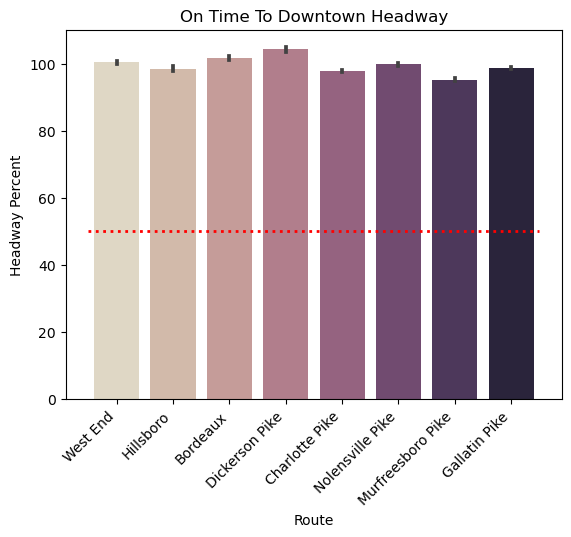

In [200]:
route_order = ['West End', 'Hillsboro', 'Bordeaux', 'Dickerson Pike', 'Charlotte Pike', 'Nolensville Pike','Murfreesboro Pike', 'Gallatin Pike']
sns.barplot(data=wego_todt_timely, x="ROUTE_ABBR", y= 'HDWY_PCT', palette="ch:s=-.2,r=.6", color= "purple", order= route_order).set_title("On Time To Downtown Headway")
plt.xlabel("Route")
plt.ylabel("Headway Percent")
plt.plot([-.5, 7.5], [50, 50], linewidth=2, linestyle='dotted', color = 'red')
plt.xticks(rotation=45, ha="right")

In [63]:
#isolate the bus route numbers
wego_filter_rt= wego_todt_ontime.filter(items= ['ROUTE_ABBR'])

In [64]:
wego_filter_rt.value_counts()

ROUTE_ABBR
55            18667
56            16874
52            16237
3             15446
50            14801
23            10336
22             6304
7              4860
Name: count, dtype: int64

In [65]:
#explore why bus route 7 is the least on time
wego_7= wego_hour_range.loc[wego_hour_range['ROUTE_ABBR'] == 7]

In [66]:
#route 7 has 17325 entries to and from downtown
wego_7

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
2123,120230801,1,99460956,2023-08-01,7,4101,907,346716,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-08-01 14:31:00,2023-08-01 14:31:27,2023-08-01 14:31:27,-0.450000,15.0,1.150000,-13.850000,0,0,1,0,0.0,0,0.000000,NaN
2124,120230801,1,99460957,2023-08-01,7,4101,907,346716,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-08-01 14:41:00,2023-08-01 14:46:54,2023-08-01 14:46:54,-5.900000,15.0,5.950000,-9.050000,0,0,1,0,0.0,0,0.000000,NaN
6176,120230801,1,99465657,2023-08-01,7,700,572,348435,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-08-01 14:15:00,2023-08-01 14:01:19,2023-08-01 14:01:19,13.683333,20.0,3.783333,-16.216667,1,0,0,0,0.0,0,0.000000,NaN
6177,120230801,1,99465658,2023-08-01,7,700,572,348435,0,FROM DOWNTOWN,21BK,4.0,0,36.138881,-86.800622,2023-08-01 14:32:00,2023-08-01 14:40:00,2023-08-01 14:40:00,-8.000000,20.0,24.050000,4.050000,0,1,0,0,0.0,0,0.000000,NaN
6179,120230801,1,99465660,2023-08-01,7,700,572,348436,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-08-01 15:04:00,2023-08-01 14:53:39,2023-08-01 15:08:46,-4.766666,15.0,19.166666,4.166666,0,0,1,0,0.0,0,15.116666,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350320,120230930,2,100406606,2023-09-30,7,702,2312,353447,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 21:45:00,2023-09-30 21:43:52,2023-09-30 21:50:54,-5.900000,30.0,36.716666,6.716666,0,0,1,0,0.0,0,7.033333,NaN
350323,120230930,2,100406609,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 22:16:00,2023-09-30 22:22:39,2023-09-30 22:24:37,-8.616666,30.0,34.916666,4.916666,0,1,0,0,0.0,0,1.966666,5.0
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 22:23:00,2023-09-30 22:31:26,2023-09-30 22:31:26,-8.433333,30.0,35.266666,5.266666,0,1,0,0,0.0,0,0.000000,NaN
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 22:45:00,2023-09-30 22:49:19,2023-09-30 22:49:19,-4.316666,30.0,31.866666,1.866666,0,0,1,0,0.0,0,0.000000,NaN


In [67]:
#there are 6875 entries to downtown
wego_7_todt= wego_todt_ontime.loc[wego_hour_range['ROUTE_ABBR'] == 7]

In [68]:
wego_7_todt

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
114418,120230820,3,100012923,2023-08-20,7,702,2312,353470,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-08-20 21:16:00,2023-08-20 21:18:32,2023-08-20 21:20:47,-4.783333,28.0,65.666666,37.666666,0,0,1,0,0.0,0,2.250000,5.0
59585,120230810,1,99724056,2023-08-10,7,705,2427,353518,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-08-10 17:40:00,2023-08-10 17:24:13,2023-08-10 17:41:53,-1.883333,15.0,50.950000,35.950000,0,0,1,0,0.0,0,17.666666,18.0
59586,120230810,1,99724057,2023-08-10,7,705,2427,353518,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-08-10 17:49:00,2023-08-10 17:49:01,2023-08-10 17:49:01,-0.016666,15.0,49.183333,34.183333,0,0,1,0,0.0,0,0.000000,NaN
114412,120230820,3,100012917,2023-08-20,7,702,2312,353468,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-08-20 20:11:00,2023-08-20 19:48:49,2023-08-20 20:15:07,-4.116666,30.0,63.166666,33.166666,0,0,1,0,0.0,0,26.300000,25.0
273262,120230917,3,100030139,2023-09-17,7,702,2312,353466,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-17 18:45:00,2023-09-17 18:50:23,2023-09-17 18:50:23,-5.383333,30.0,63.166666,33.166666,0,0,1,0,0.0,0,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53042,120230809,1,99690001,2023-08-09,7,704,2324,353507,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-08-09 18:10:00,2023-08-09 18:14:48,2023-08-09 18:14:48,-4.800000,30.0,9.333333,-20.666667,0,0,1,0,0.0,0,0.000000,4.0
110622,120230819,2,99993351,2023-08-19,7,702,1277,353426,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-08-19 06:41:00,2023-08-19 06:16:31,2023-08-19 06:43:58,-2.966666,30.0,7.350000,-22.650000,0,0,1,0,0.0,0,27.450000,NaN
59553,120230810,1,99724022,2023-08-10,7,704,2324,353507,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-08-10 18:19:00,2023-08-10 18:20:53,2023-08-10 18:20:53,-1.883333,30.0,6.450000,-23.550000,0,0,1,0,0.0,0,0.000000,NaN
191374,120230902,2,100392780,2023-09-02,7,701,2164,353384,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-02 18:07:00,2023-09-02 17:55:44,2023-09-02 18:10:47,-3.783333,30.0,6.200000,-23.800000,0,0,1,0,0.0,0,15.050000,20.0


In [69]:
wego_7_todt.value_counts('ROUTE_ABBR')

ROUTE_ABBR
7    4860
Name: count, dtype: int64

In [70]:
wego_todt_ontime = wego_todt_ontime.dropna(subset=['ADHERENCE','ACTUAL_HDWY','SCHEDULED_HDWY'])

In [71]:
wego_7_total= wego_hour_range.loc[wego_hour_range['ROUTE_ABBR']==7].loc[wego_hour_range['ROUTE_DIRECTION_NAME'] == 'TO DOWNTOWN']


In [72]:
#there are 8225 total routes 
wego_7_total

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
2123,120230801,1,99460956,2023-08-01,7,4101,907,346716,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-08-01 14:31:00,2023-08-01 14:31:27,2023-08-01 14:31:27,-0.450000,15.0,1.150000,-13.850000,0,0,1,0,0.0,0,0.000000,NaN
2124,120230801,1,99460957,2023-08-01,7,4101,907,346716,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-08-01 14:41:00,2023-08-01 14:46:54,2023-08-01 14:46:54,-5.900000,15.0,5.950000,-9.050000,0,0,1,0,0.0,0,0.000000,NaN
6179,120230801,1,99465660,2023-08-01,7,700,572,348436,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-08-01 15:04:00,2023-08-01 14:53:39,2023-08-01 15:08:46,-4.766666,15.0,19.166666,4.166666,0,0,1,0,0.0,0,15.116666,12.0
6180,120230801,1,99465661,2023-08-01,7,700,572,348436,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-08-01 15:14:00,2023-08-01 15:35:22,2023-08-01 15:35:22,-21.366666,15.0,1.966666,-13.033334,0,1,0,0,0.0,0,0.000000,NaN
6185,120230801,1,99465666,2023-08-01,7,700,572,348438,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-08-01 16:34:00,2023-08-01 16:29:12,2023-08-01 16:37:07,-3.116666,15.0,21.233333,6.233333,0,0,1,0,0.0,0,7.916666,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350312,120230930,2,100406598,2023-09-30,7,702,2312,353444,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 20:18:00,2023-09-30 20:24:13,2023-09-30 20:24:13,-6.216666,30.0,35.516666,5.516666,0,1,0,0,0.0,0,0.000000,NaN
350317,120230930,2,100406603,2023-09-30,7,702,2312,353446,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 21:16:00,2023-09-30 21:12:40,2023-09-30 21:16:51,-0.850000,28.0,26.066666,-1.933334,0,0,1,0,0.0,0,4.183333,5.0
350318,120230930,2,100406604,2023-09-30,7,702,2312,353446,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 21:23:00,2023-09-30 21:30:00,2023-09-30 21:30:00,-7.000000,28.0,31.566666,3.566666,0,1,0,0,0.0,0,0.000000,NaN
350323,120230930,2,100406609,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 22:16:00,2023-09-30 22:22:39,2023-09-30 22:24:37,-8.616666,30.0,34.916666,4.916666,0,1,0,0,0.0,0,1.966666,5.0


### TO Downtown NOT on time per Adjusted OnTime Count

In [73]:
wego_todt_untimely = wego_hour_range.loc[wego_hour_range['ROUTE_DIRECTION_NAME'] == 'TO DOWNTOWN'].loc[wego_hour_range['ADJUSTED_ONTIME_COUNT'] != 1][['DATE', 'TRIP_ID', 'ROUTE_ABBR','ROUTE_DIRECTION_NAME', 'TRIP_EDGE', 
      'ADHERENCE','ACTUAL_HDWY','SCHEDULED_HDWY','HDWY_DEV']]    
 

In [74]:
#wego_trim = wego_trim.dropna(subset=['ADHERENCE','ACTUAL_HDWY','SCHEDULED_HDWY'])
wego_todt_untimely= wego_todt_untimely.dropna(subset=['ADHERENCE','ACTUAL_HDWY','SCHEDULED_HDWY'])

In [75]:
def BUNCH_GAP(wego_todt_untimely):
    if wego_todt_untimely['HDWY_DEV'] < 0:
        return "Bunching"
    elif wego_todt_untimely['HDWY_DEV'] > 0:
        return "Gapping"
    else:
        return np.NaN

In [76]:
wego_todt_untimely['BUNCH_GAP'] = wego_todt_untimely.apply(BUNCH_GAP, axis=1)

In [77]:
wego_todt_untimely['Bunching']= wego_todt_untimely['HDWY_DEV'] < 0
wego_todt_untimely['Gapping']= wego_todt_untimely['HDWY_DEV'] > 0

In [78]:
wego_todt_untimely['HDWY_PCT']= wego_todt_untimely['ACTUAL_HDWY']/wego_todt_untimely['SCHEDULED_HDWY']*100

In [79]:
wego_todt_untimely['Acceptable']= wego_todt_untimely['HDWY_PCT'].between(50, 150)

In [80]:
wego_todt_untimely[['DATE', 'TRIP_ID', 'ROUTE_ABBR','ROUTE_DIRECTION_NAME', 'TRIP_EDGE', 
      'ACTUAL_HDWY', 'HDWY_DEV','HDWY_PCT','BUNCH_GAP','Bunching','Gapping', 'Acceptable']]

,DATE,TRIP_ID,ROUTE_ABBR,ROUTE_DIRECTION_NAME,TRIP_EDGE,ACTUAL_HDWY,HDWY_DEV,HDWY_PCT,BUNCH_GAP,Bunching,Gapping,Acceptable
78,2023-08-01,345127,22,TO DOWNTOWN,0,16.683333,4.683333,139.027775,Gapping,False,True,True
91,2023-08-01,345131,22,TO DOWNTOWN,1,54.166666,4.166666,108.333332,Gapping,False,True,True
92,2023-08-01,345131,22,TO DOWNTOWN,0,30.816666,5.816666,123.266664,Gapping,False,True,True
104,2023-08-01,345135,22,TO DOWNTOWN,0,33.066666,3.066666,110.222220,Gapping,False,True,True
186,2023-08-01,345229,22,TO DOWNTOWN,0,4.616666,-7.383334,38.472217,Bunching,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
350300,2023-09-30,353440,7,TO DOWNTOWN,0,35.166666,5.166666,117.222220,Gapping,False,True,True
350312,2023-09-30,353444,7,TO DOWNTOWN,0,35.516666,5.516666,118.388887,Gapping,False,True,True
350318,2023-09-30,353446,7,TO DOWNTOWN,0,31.566666,3.566666,112.738093,Gapping,False,True,True
350323,2023-09-30,353448,7,TO DOWNTOWN,1,34.916666,4.916666,116.388887,Gapping,False,True,True


In [180]:
route_id = {
    '3': 'West End',
    '7': 'Hillsboro',
    '22': 'Bordeaux',
    '23': 'Dickerson Pike',
    '50': 'Charlotte Pike',
    '52': 'Nolensville Pike',
    '55': 'Murfreesboro Pike',
    '56': 'Gallatin Pike'
}
wego_todt_untimely['ROUTE_ABBR'] = wego_todt_untimely['ROUTE_ABBR'].astype(str).replace(route_id)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'West End'),
  Text(1, 0, 'Hillsboro'),
  Text(2, 0, 'Bordeaux'),
  Text(3, 0, 'Dickerson Pike'),
  Text(4, 0, 'Charlotte Pike'),
  Text(5, 0, 'Nolensville Pike'),
  Text(6, 0, 'Murfreesboro Pike'),
  Text(7, 0, 'Gallatin Pike')])

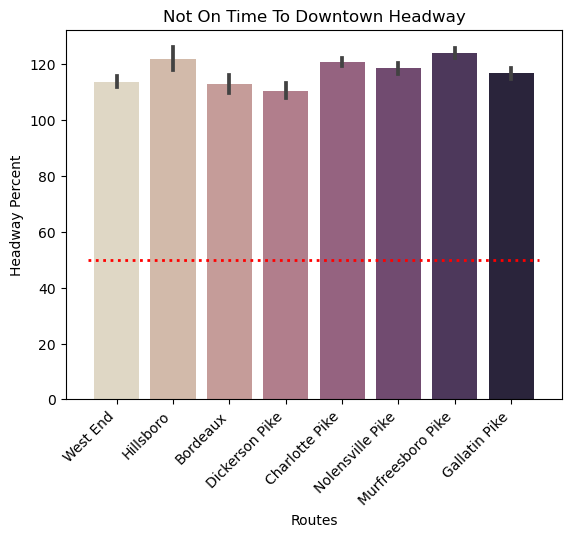

In [201]:
route_order = ['West End', 'Hillsboro', 'Bordeaux', 'Dickerson Pike', 'Charlotte Pike', 'Nolensville Pike','Murfreesboro Pike', 'Gallatin Pike']
sns.barplot(data=wego_todt_untimely, x="ROUTE_ABBR", y= 'HDWY_PCT', palette="ch:s=-.2,r=.6", order= route_order).set_title("Not On Time To Downtown Headway")
plt.xlabel("Routes")
plt.ylabel("Headway Percent")
plt.plot([-.5, 7.5], [50, 50], linewidth=2, linestyle='dotted', color = 'red')
plt.xticks(rotation=45, ha="right")

### From Downtown on time per Adjusted OnTime Count

In [82]:
wego_fmdt_ontime = wego_hour_range.loc[wego_hour_range['ROUTE_DIRECTION_NAME'] == 'FROM DOWNTOWN'].loc[wego_hour_range['ADJUSTED_ONTIME_COUNT'] == 1]

In [83]:
wego_fmdt_ontime[['DATE', 'TRIP_ID', 'ROUTE_ABBR','ROUTE_DIRECTION_NAME', 'TRIP_EDGE', 
      'ACTUAL_HDWY', 'HDWY_DEV']]

,DATE,TRIP_ID,ROUTE_ABBR,ROUTE_DIRECTION_NAME,TRIP_EDGE,ACTUAL_HDWY,HDWY_DEV
11,2023-08-01,345107,22,FROM DOWNTOWN,1,12.833333,-2.166667
18,2023-08-01,345109,22,FROM DOWNTOWN,1,15.233333,0.233333
19,2023-08-01,345109,22,FROM DOWNTOWN,0,14.616666,-0.383334
25,2023-08-01,345111,22,FROM DOWNTOWN,1,14.833333,-0.166667
26,2023-08-01,345111,22,FROM DOWNTOWN,0,14.850000,-0.150000
...,...,...,...,...,...,...,...
350308,2023-09-30,353443,7,FROM DOWNTOWN,1,28.350000,-1.650000
350314,2023-09-30,353445,7,FROM DOWNTOWN,1,31.200000,1.200000
350315,2023-09-30,353445,7,FROM DOWNTOWN,0,30.316666,2.316666
350320,2023-09-30,353447,7,FROM DOWNTOWN,1,36.716666,6.716666


In [84]:
import numpy as np

In [85]:
def BUNCH_GAP(wego_fmdt_ontime):
    if wego_fmdt_ontime['HDWY_DEV'] < 0:
        return "Bunching"
    elif wego_fmdt_ontime['HDWY_DEV'] > 0:
        return "Gapping"
    else:
        return np.NaN



In [86]:
wego_fmdt_ontime.apply(BUNCH_GAP, axis=1)

11        Bunching
18         Gapping
19        Bunching
25        Bunching
26        Bunching
            ...   
350308    Bunching
350314     Gapping
350315     Gapping
350320     Gapping
350326     Gapping
Length: 104805, dtype: object

In [87]:
wego_fmdt_ontime['BUNCH_GAP'] = wego_fmdt_ontime.apply(BUNCH_GAP, axis=1)

In [88]:
# conditions = [
#     (wego_fmdt_ontime['HDWY_DEV'] < 0),
#     (wego_fmdt_ontime['HDWY_DEV'] > 0)
# ]

# results = ["Bunching", "Gapping"]

# wego_fmdt_ontime['BUNCH_GAP']= np.select(conditions, results)

In [89]:
wego_fmdt_ontime['Bunching']= wego_fmdt_ontime['HDWY_DEV'] < 0
wego_fmdt_ontime['Gapping']= wego_fmdt_ontime['HDWY_DEV'] > 0

In [90]:
wego_fmdt_ontime.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,BUNCH_GAP,Bunching,Gapping
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0,Bunching,True,False
18,120230801,1,99457908,2023-08-01,22,2200,1040,345109,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 07:15:00,2023-08-01 07:05:49,2023-08-01 07:16:44,-1.733333,15.0,15.233333,0.233333,0,0,1,0,0.0,0,10.916666,5.0,Gapping,False,True
19,120230801,1,99457909,2023-08-01,22,2200,1040,345109,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 07:25:00,2023-08-01 07:24:02,2023-08-01 07:24:02,0.966666,15.0,14.616666,-0.383334,0,0,1,0,0.0,0,0.000000,NaN,Bunching,True,False
25,120230801,1,99457915,2023-08-01,22,2200,1040,345111,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 08:15:00,2023-08-01 08:05:31,2023-08-01 08:18:01,-3.016666,15.0,14.833333,-0.166667,0,0,1,0,0.0,0,12.500000,5.0,Bunching,True,False
26,120230801,1,99457916,2023-08-01,22,2200,1040,345111,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 08:25:00,2023-08-01 08:26:31,2023-08-01 08:26:31,-1.516666,15.0,14.850000,-0.150000,0,0,1,0,0.0,0,0.000000,NaN,Bunching,True,False


In [91]:
wego_fmdt_ontime['HDWY_PCT']= wego_fmdt_ontime['ACTUAL_HDWY']/wego_fmdt_ontime['SCHEDULED_HDWY']*100

In [92]:
wego_fmdt_ontime['Acceptable']= wego_fmdt_ontime['HDWY_PCT'].between(50, 150)

In [93]:
wego_fmdt_ontime[['DATE', 'TRIP_ID', 'ROUTE_ABBR','ROUTE_DIRECTION_NAME', 'TRIP_EDGE', 
      'ACTUAL_HDWY', 'HDWY_DEV','HDWY_PCT','BUNCH_GAP','Bunching','Gapping', 'Acceptable']]

,DATE,TRIP_ID,ROUTE_ABBR,ROUTE_DIRECTION_NAME,TRIP_EDGE,ACTUAL_HDWY,HDWY_DEV,HDWY_PCT,BUNCH_GAP,Bunching,Gapping,Acceptable
11,2023-08-01,345107,22,FROM DOWNTOWN,1,12.833333,-2.166667,85.555553,Bunching,True,False,True
18,2023-08-01,345109,22,FROM DOWNTOWN,1,15.233333,0.233333,101.555553,Gapping,False,True,True
19,2023-08-01,345109,22,FROM DOWNTOWN,0,14.616666,-0.383334,97.444440,Bunching,True,False,True
25,2023-08-01,345111,22,FROM DOWNTOWN,1,14.833333,-0.166667,98.888887,Bunching,True,False,True
26,2023-08-01,345111,22,FROM DOWNTOWN,0,14.850000,-0.150000,99.000000,Bunching,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
350308,2023-09-30,353443,7,FROM DOWNTOWN,1,28.350000,-1.650000,94.500000,Bunching,True,False,True
350314,2023-09-30,353445,7,FROM DOWNTOWN,1,31.200000,1.200000,104.000000,Gapping,False,True,True
350315,2023-09-30,353445,7,FROM DOWNTOWN,0,30.316666,2.316666,108.273807,Gapping,False,True,True
350320,2023-09-30,353447,7,FROM DOWNTOWN,1,36.716666,6.716666,122.388887,Gapping,False,True,True


In [184]:
route_id = {
    '3': 'West End',
    '7': 'Hillsboro',
    '22': 'Bordeaux',
    '23': 'Dickerson Pike',
    '50': 'Charlotte Pike',
    '52': 'Nolensville Pike',
    '55': 'Murfreesboro Pike',
    '56': 'Gallatin Pike'
}
wego_fmdt_ontime['ROUTE_ABBR'] = wego_fmdt_ontime['ROUTE_ABBR'].astype(str).replace(route_id)

In [185]:
wego_fmdt_ontime =wego_fmdt_ontime.dropna(subset=['ADHERENCE','ACTUAL_HDWY','SCHEDULED_HDWY'])

wego_fmdt_ontime

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,BUNCH_GAP,Bunching,Gapping,HDWY_PCT,Acceptable
11,120230801,1,99457901,2023-08-01,Bordeaux,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0,Bunching,True,False,85.555553,True
18,120230801,1,99457908,2023-08-01,Bordeaux,2200,1040,345109,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 07:15:00,2023-08-01 07:05:49,2023-08-01 07:16:44,-1.733333,15.0,15.233333,0.233333,0,0,1,0,0.0,0,10.916666,5.0,Gapping,False,True,101.555553,True
19,120230801,1,99457909,2023-08-01,Bordeaux,2200,1040,345109,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 07:25:00,2023-08-01 07:24:02,2023-08-01 07:24:02,0.966666,15.0,14.616666,-0.383334,0,0,1,0,0.0,0,0.000000,NaN,Bunching,True,False,97.444440,True
25,120230801,1,99457915,2023-08-01,Bordeaux,2200,1040,345111,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 08:15:00,2023-08-01 08:05:31,2023-08-01 08:18:01,-3.016666,15.0,14.833333,-0.166667,0,0,1,0,0.0,0,12.500000,5.0,Bunching,True,False,98.888887,True
26,120230801,1,99457916,2023-08-01,Bordeaux,2200,1040,345111,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 08:25:00,2023-08-01 08:26:31,2023-08-01 08:26:31,-1.516666,15.0,14.850000,-0.150000,0,0,1,0,0.0,0,0.000000,NaN,Bunching,True,False,99.000000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350308,120230930,2,100406594,2023-09-30,Hillsboro,702,2312,353443,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 19:15:00,2023-09-30 19:06:51,2023-09-30 19:19:03,-4.050000,30.0,28.350000,-1.650000,0,0,1,0,0.0,0,12.200000,12.0,Bunching,True,False,94.500000,True
350314,120230930,2,100406600,2023-09-30,Hillsboro,702,2312,353445,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 20:45:00,2023-09-30 20:40:02,2023-09-30 20:48:17,-3.283333,30.0,31.200000,1.200000,0,0,1,0,0.0,0,8.250000,NaN,Gapping,False,True,104.000000,True
350315,120230930,2,100406601,2023-09-30,Hillsboro,702,2312,353445,0,FROM DOWNTOWN,21BK,4.0,0,36.138881,-86.800622,2023-09-30 20:59:00,2023-09-30 21:02:20,2023-09-30 21:02:20,-3.333333,28.0,30.316666,2.316666,0,0,1,0,0.0,0,0.000000,NaN,Gapping,False,True,108.273807,True
350320,120230930,2,100406606,2023-09-30,Hillsboro,702,2312,353447,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 21:45:00,2023-09-30 21:43:52,2023-09-30 21:50:54,-5.900000,30.0,36.716666,6.716666,0,0,1,0,0.0,0,7.033333,NaN,Gapping,False,True,122.388887,True


In [186]:
wego_fmdt_ontime[['DATE', 'TRIP_ID', 'ROUTE_ABBR','ROUTE_DIRECTION_NAME', 'TRIP_EDGE', 
      'ACTUAL_HDWY', 'HDWY_DEV','BUNCH_GAP']]

,DATE,TRIP_ID,ROUTE_ABBR,ROUTE_DIRECTION_NAME,TRIP_EDGE,ACTUAL_HDWY,HDWY_DEV,BUNCH_GAP
11,2023-08-01,345107,Bordeaux,FROM DOWNTOWN,1,12.833333,-2.166667,Bunching
18,2023-08-01,345109,Bordeaux,FROM DOWNTOWN,1,15.233333,0.233333,Gapping
19,2023-08-01,345109,Bordeaux,FROM DOWNTOWN,0,14.616666,-0.383334,Bunching
25,2023-08-01,345111,Bordeaux,FROM DOWNTOWN,1,14.833333,-0.166667,Bunching
26,2023-08-01,345111,Bordeaux,FROM DOWNTOWN,0,14.850000,-0.150000,Bunching
...,...,...,...,...,...,...,...,...
350308,2023-09-30,353443,Hillsboro,FROM DOWNTOWN,1,28.350000,-1.650000,Bunching
350314,2023-09-30,353445,Hillsboro,FROM DOWNTOWN,1,31.200000,1.200000,Gapping
350315,2023-09-30,353445,Hillsboro,FROM DOWNTOWN,0,30.316666,2.316666,Gapping
350320,2023-09-30,353447,Hillsboro,FROM DOWNTOWN,1,36.716666,6.716666,Gapping


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'West End'),
  Text(1, 0, 'Hillsboro'),
  Text(2, 0, 'Bordeaux'),
  Text(3, 0, 'Dickerson Pike'),
  Text(4, 0, 'Charlotte Pike'),
  Text(5, 0, 'Nolensville Pike'),
  Text(6, 0, 'Murfreesboro Pike'),
  Text(7, 0, 'Gallatin Pike')])

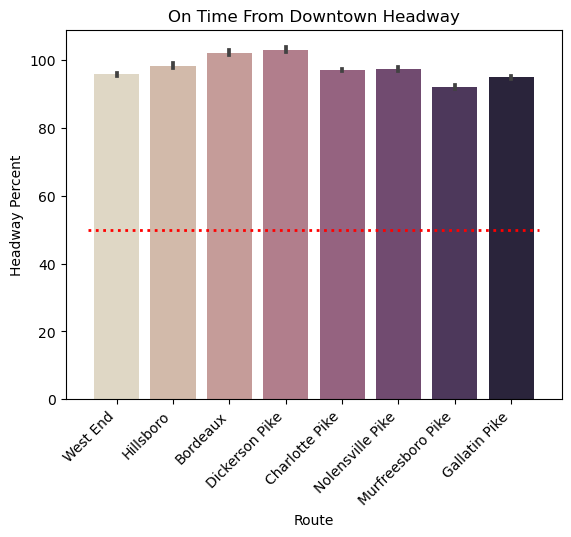

In [202]:
route_order = ['West End', 'Hillsboro', 'Bordeaux', 'Dickerson Pike', 'Charlotte Pike', 'Nolensville Pike','Murfreesboro Pike', 'Gallatin Pike']
sns.barplot(data=wego_fmdt_ontime, x="ROUTE_ABBR", y= 'HDWY_PCT', palette="ch:s=-.2,r=.6", order=route_order).set_title("On Time From Downtown Headway")
plt.xlabel("Route")
plt.ylabel("Headway Percent")
plt.plot([-.5, 7.5], [50, 50], linewidth=2, linestyle='dotted', color = 'red')
plt.xticks(rotation=45, ha="right")

In [97]:
wego_fmdt_ontime_count= wego_fmdt_ontime.value_counts('ROUTE_ABBR')
wego_fmdt_ontime_count

ROUTE_ABBR
56    22006
55    15673
23    14503
50    14294
52    14128
3     12279
22     7670
7      4252
Name: count, dtype: int64

### From Downtown NOT on time per Adjustted OnTime Count

In [98]:
wego_fmdt_untimely = wego_hour_range.loc[wego_hour_range['ROUTE_DIRECTION_NAME'] == 'FROM DOWNTOWN'].loc[wego_hour_range['ADJUSTED_ONTIME_COUNT'] != 1][['DATE', 'TRIP_ID', 'ROUTE_ABBR','ROUTE_DIRECTION_NAME', 'TRIP_EDGE', 
      'ADHERENCE','ACTUAL_HDWY','SCHEDULED_HDWY','HDWY_DEV']]  

In [188]:
route_id = {
    '3': 'West End',
    '7': 'Hillsboro',
    '22': 'Bordeaux',
    '23': 'Dickerson Pike',
    '50': 'Charlotte Pike',
    '52': 'Nolensville Pike',
    '55': 'Murfreesboro Pike',
    '56': 'Gallatin Pike'
}
wego_fmdt_untimely['ROUTE_ABBR'] = wego_fmdt_untimely['ROUTE_ABBR'].astype(str).replace(route_id)

In [189]:
wego_fmdt_untimely

,DATE,TRIP_ID,ROUTE_ABBR,ROUTE_DIRECTION_NAME,TRIP_EDGE,ADHERENCE,ACTUAL_HDWY,SCHEDULED_HDWY,HDWY_DEV,BUNCH_GAP,Bunching,Gapping,HDWY_PCT,Acceptable
12,2023-08-01,345107,Bordeaux,FROM DOWNTOWN,0,1.500000,11.116666,15.0,-3.883334,Bunching,True,False,74.111107,True
32,2023-08-01,345113,Bordeaux,FROM DOWNTOWN,0,1.266666,10.483333,16.0,-5.516667,Bunching,True,False,65.520831,True
38,2023-08-01,345115,Bordeaux,FROM DOWNTOWN,0,1.883333,8.850000,12.0,-3.150000,Bunching,True,False,73.750000,True
83,2023-08-01,345128,Bordeaux,FROM DOWNTOWN,0,-7.266666,45.016666,49.0,-3.983334,Bunching,True,False,91.870747,True
94,2023-08-01,345132,Bordeaux,FROM DOWNTOWN,1,-7.083333,37.316666,30.0,7.316666,Gapping,False,True,124.388887,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350297,2023-09-30,353439,Hillsboro,FROM DOWNTOWN,0,-6.716666,30.100000,30.0,0.100000,Gapping,False,True,100.333333,True
350302,2023-09-30,353441,Hillsboro,FROM DOWNTOWN,1,-11.950000,39.933333,30.0,9.933333,Gapping,False,True,133.111110,True
350303,2023-09-30,353441,Hillsboro,FROM DOWNTOWN,0,-18.850000,44.500000,30.0,14.500000,Gapping,False,True,148.333333,True
350309,2023-09-30,353443,Hillsboro,FROM DOWNTOWN,0,-7.883333,29.233333,30.0,-0.766667,Bunching,True,False,97.444443,True


In [190]:
wego_fmdt_untimely= wego_fmdt_untimely.dropna(subset=['ADHERENCE','ACTUAL_HDWY','SCHEDULED_HDWY'])

In [191]:
def BUNCH_GAP(wego_fmdt_untimely):
    if wego_fmdt_untimely['HDWY_DEV'] < 0:
        return "Bunching"
    elif wego_fmdt_untimely['HDWY_DEV'] > 0:
        return "Gapping"
    else:
        return np.NaN

In [192]:
wego_fmdt_untimely['BUNCH_GAP'] = wego_fmdt_untimely.apply(BUNCH_GAP, axis=1)

In [193]:
wego_fmdt_untimely['Bunching']= wego_fmdt_untimely['HDWY_DEV'] < 0
wego_fmdt_untimely['Gapping']= wego_fmdt_untimely['HDWY_DEV'] > 0

In [194]:
wego_fmdt_untimely['HDWY_PCT']= wego_fmdt_untimely['ACTUAL_HDWY']/wego_fmdt_untimely['SCHEDULED_HDWY']*100

In [195]:
wego_fmdt_untimely['Acceptable']= wego_fmdt_untimely['HDWY_PCT'].between(50, 150)

In [196]:
wego_fmdt_untimely[['DATE', 'TRIP_ID', 'ROUTE_ABBR','ROUTE_DIRECTION_NAME', 'TRIP_EDGE', 
      'ACTUAL_HDWY', 'HDWY_DEV','HDWY_PCT','BUNCH_GAP','Bunching','Gapping', 'Acceptable']]

,DATE,TRIP_ID,ROUTE_ABBR,ROUTE_DIRECTION_NAME,TRIP_EDGE,ACTUAL_HDWY,HDWY_DEV,HDWY_PCT,BUNCH_GAP,Bunching,Gapping,Acceptable
12,2023-08-01,345107,Bordeaux,FROM DOWNTOWN,0,11.116666,-3.883334,74.111107,Bunching,True,False,True
32,2023-08-01,345113,Bordeaux,FROM DOWNTOWN,0,10.483333,-5.516667,65.520831,Bunching,True,False,True
38,2023-08-01,345115,Bordeaux,FROM DOWNTOWN,0,8.850000,-3.150000,73.750000,Bunching,True,False,True
83,2023-08-01,345128,Bordeaux,FROM DOWNTOWN,0,45.016666,-3.983334,91.870747,Bunching,True,False,True
94,2023-08-01,345132,Bordeaux,FROM DOWNTOWN,1,37.316666,7.316666,124.388887,Gapping,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
350297,2023-09-30,353439,Hillsboro,FROM DOWNTOWN,0,30.100000,0.100000,100.333333,Gapping,False,True,True
350302,2023-09-30,353441,Hillsboro,FROM DOWNTOWN,1,39.933333,9.933333,133.111110,Gapping,False,True,True
350303,2023-09-30,353441,Hillsboro,FROM DOWNTOWN,0,44.500000,14.500000,148.333333,Gapping,False,True,True
350309,2023-09-30,353443,Hillsboro,FROM DOWNTOWN,0,29.233333,-0.766667,97.444443,Bunching,True,False,True


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'West End'),
  Text(1, 0, 'Hillsboro'),
  Text(2, 0, 'Bordeaux'),
  Text(3, 0, 'Dickerson Pike'),
  Text(4, 0, 'Charlotte Pike'),
  Text(5, 0, 'Nolensville Pike'),
  Text(6, 0, 'Murfreesboro Pike'),
  Text(7, 0, 'Gallatin Pike')])

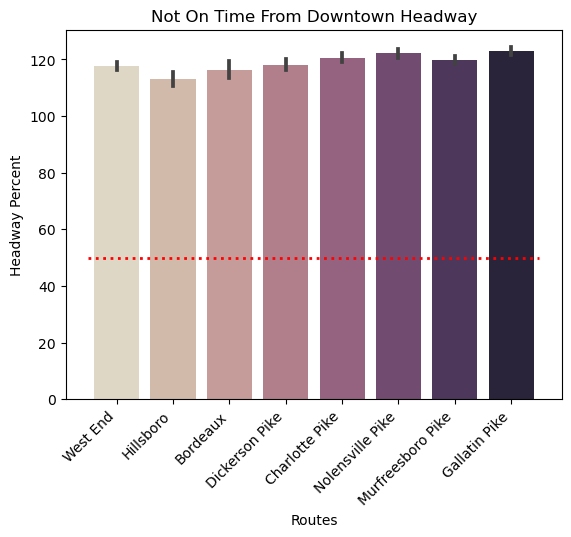

In [203]:
route_order = ['West End', 'Hillsboro', 'Bordeaux', 'Dickerson Pike', 'Charlotte Pike', 'Nolensville Pike','Murfreesboro Pike', 'Gallatin Pike']
sns.barplot(data=wego_fmdt_untimely, x="ROUTE_ABBR", y= 'HDWY_PCT',  palette="ch:s=-.2,r=.6", order=route_order).set_title("Not On Time From Downtown Headway")
plt.xlabel("Routes")
plt.ylabel("Headway Percent")
plt.plot([-.5, 7.5], [50, 50], linewidth=2, linestyle='dotted', color = 'red')
plt.xticks(rotation=45, ha="right")

### 3. How does time of day or day of week affect headway and on-time performance?

In [108]:
wego_hour_range

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0
8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,0.000000,NaN
9,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0,14.516666,-0.483334,0,0,1,0,0.0,0,0.000000,NaN
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0
12,120230801,1,99457902,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 06:25:00,2023-08-01 06:23:30,2023-08-01 06:23:30,1.500000,15.0,11.116666,-3.883334,1,0,0,0,0.0,0,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350320,120230930,2,100406606,2023-09-30,7,702,2312,353447,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 21:45:00,2023-09-30 21:43:52,2023-09-30 21:50:54,-5.900000,30.0,36.716666,6.716666,0,0,1,0,0.0,0,7.033333,NaN
350323,120230930,2,100406609,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 22:16:00,2023-09-30 22:22:39,2023-09-30 22:24:37,-8.616666,30.0,34.916666,4.916666,0,1,0,0,0.0,0,1.966666,5.0
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 22:23:00,2023-09-30 22:31:26,2023-09-30 22:31:26,-8.433333,30.0,35.266666,5.266666,0,1,0,0,0.0,0,0.000000,NaN
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 22:45:00,2023-09-30 22:49:19,2023-09-30 22:49:19,-4.316666,30.0,31.866666,1.866666,0,0,1,0,0.0,0,0.000000,NaN


In [109]:
wego_hour_range['SCHEDULED_TIME'].info()

<class 'pandas.core.series.Series'>
Index: 261412 entries, 7 to 350327
Series name: SCHEDULED_TIME
Non-Null Count   Dtype 
--------------   ----- 
261412 non-null  object
dtypes: object(1)
memory usage: 12.1+ MB


In [110]:
wego_hour_range['ACTUAL_ARRIVAL_TIME'].info()

<class 'pandas.core.series.Series'>
Index: 261412 entries, 7 to 350327
Series name: ACTUAL_ARRIVAL_TIME
Non-Null Count   Dtype 
--------------   ----- 
261410 non-null  object
dtypes: object(1)
memory usage: 12.1+ MB


In [111]:
#df['col'] = pd.to_datetime(df['col'])
wego_hour_range['SCHEDULED_TIME'] = pd.to_datetime(wego_hour_range['SCHEDULED_TIME'])

C:\Users\ymcmu\AppData\Local\Temp\ipykernel_33904\4083269536.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wego_hour_range['SCHEDULED_TIME'] = pd.to_datetime(wego_hour_range['SCHEDULED_TIME'])


In [112]:
#created hour column
def hr_func(ts):
    return ts.hour

wego_hour_range['hour']= wego_hour_range['SCHEDULED_TIME'].apply(hr_func)

C:\Users\ymcmu\AppData\Local\Temp\ipykernel_33904\4088781524.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wego_hour_range['hour']= wego_hour_range['SCHEDULED_TIME'].apply(hr_func)


In [139]:
route_id = {
    '3': 'West End',
    '7': 'Hillsboro',
    '22': 'Bordeaux',
    '23': 'Dickerson Pike',
    '50': 'Charlotte Pike',
    '52': 'Nolensville Pike',
    '55': 'Murfreesboro Pike',
    '56': 'Gallatin Pike'
}
wego_hour_range['ROUTE_ABBR'] = wego_hour_range['ROUTE_ABBR'].astype(str).replace(route_id)
wego_hour_range

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,hour,BUNCH_GAP,HDWY_PCT,Acceptable,day,weekday,calender_trip_ID,Unique_Trips
7,120230801,1,99457897,2023-08-01,Bordeaux,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0,5,Gapping,107.619046,True,5,Tuesday,345106120230801,NaN
8,120230801,1,99457898,2023-08-01,Bordeaux,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,0.000000,NaN,5,Gapping,105.619046,True,5,Tuesday,345106120230801,NaN
9,120230801,1,99457899,2023-08-01,Bordeaux,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0,14.516666,-0.483334,0,0,1,0,0.0,0,0.000000,NaN,5,Bunching,96.777773,True,5,Tuesday,345106120230801,NaN
11,120230801,1,99457901,2023-08-01,Bordeaux,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0,6,Bunching,85.555553,True,6,Tuesday,345107120230801,NaN
12,120230801,1,99457902,2023-08-01,Bordeaux,2200,1040,345107,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 06:25:00,2023-08-01 06:23:30,2023-08-01 06:23:30,1.500000,15.0,11.116666,-3.883334,1,0,0,0,0.0,0,0.000000,NaN,6,Bunching,74.111107,True,6,Tuesday,345107120230801,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350320,120230930,2,100406606,2023-09-30,Hillsboro,702,2312,353447,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 21:45:00,2023-09-30 21:43:52,2023-09-30 21:50:54,-5.900000,30.0,36.716666,6.716666,0,0,1,0,0.0,0,7.033333,NaN,21,Gapping,122.388887,True,21,Saturday,353447120230930,NaN
350323,120230930,2,100406609,2023-09-30,Hillsboro,702,2312,353448,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 22:16:00,2023-09-30 22:22:39,2023-09-30 22:24:37,-8.616666,30.0,34.916666,4.916666,0,1,0,0,0.0,0,1.966666,5.0,22,Gapping,116.388887,True,22,Saturday,353448120230930,NaN
350324,120230930,2,100406610,2023-09-30,Hillsboro,702,2312,353448,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 22:23:00,2023-09-30 22:31:26,2023-09-30 22:31:26,-8.433333,30.0,35.266666,5.266666,0,1,0,0,0.0,0,0.000000,NaN,22,Gapping,117.555553,True,22,Saturday,353448120230930,NaN
350326,120230930,2,100406612,2023-09-30,Hillsboro,702,2312,353449,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 22:45:00,2023-09-30 22:49:19,2023-09-30 22:49:19,-4.316666,30.0,31.866666,1.866666,0,0,1,0,0.0,0,0.000000,NaN,22,Gapping,106.222220,True,22,Saturday,353449120230930,NaN


In [114]:
def BUNCH_GAP(wego_hour_range):
    if wego_hour_range['HDWY_DEV'] < 0:
        return "Bunching"
    elif wego_hour_range['HDWY_DEV'] > 0:
        return "Gapping"
    else:
        return np.NaN
    
wego_hour_range['BUNCH_GAP'] = wego_hour_range.apply(BUNCH_GAP, axis=1)

C:\Users\ymcmu\AppData\Local\Temp\ipykernel_33904\821957004.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wego_hour_range['BUNCH_GAP'] = wego_hour_range.apply(BUNCH_GAP, axis=1)


In [142]:
wego_hour_range['HDWY_PCT']= wego_hour_range['ACTUAL_HDWY']/wego_hour_range['SCHEDULED_HDWY']*100

In [143]:
wego_hour_range['Acceptable']= wego_hour_range['HDWY_PCT'].between(50, 150)

In [144]:
wego_hour_range[['ROUTE_ABBR','TRIP_EDGE', 'hour',
      'ACTUAL_HDWY', 'HDWY_DEV','HDWY_PCT','BUNCH_GAP','Acceptable']]

,ROUTE_ABBR,TRIP_EDGE,hour,ACTUAL_HDWY,HDWY_DEV,HDWY_PCT,BUNCH_GAP,Acceptable
7,Bordeaux,1,5,37.666666,2.666666,107.619046,Gapping,True
8,Bordeaux,0,5,36.966666,1.966666,105.619046,Gapping,True
9,Bordeaux,0,5,14.516666,-0.483334,96.777773,Bunching,True
11,Bordeaux,1,6,12.833333,-2.166667,85.555553,Bunching,True
12,Bordeaux,0,6,11.116666,-3.883334,74.111107,Bunching,True
...,...,...,...,...,...,...,...,...
350320,Hillsboro,1,21,36.716666,6.716666,122.388887,Gapping,True
350323,Hillsboro,1,22,34.916666,4.916666,116.388887,Gapping,True
350324,Hillsboro,0,22,35.266666,5.266666,117.555553,Gapping,True
350326,Hillsboro,1,22,31.866666,1.866666,106.222220,Gapping,True


In [145]:
wego_ontime_pct= wego_hour_range.groupby("hour")[['ADJUSTED_EARLY_COUNT','ADJUSTED_LATE_COUNT','ADJUSTED_ONTIME_COUNT']].mean()*100

In [146]:
wego_ontime_pct= wego_ontime_pct.reset_index()

Text(0, 0.5, 'Percent on Time')

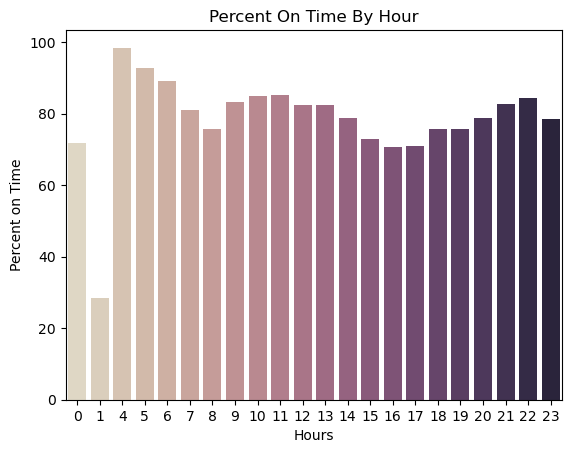

In [147]:
sns.barplot(data=wego_ontime_pct, x='hour', y= 'ADJUSTED_ONTIME_COUNT',  palette="ch:s=-.2,r=.6").set_title("Percent On Time By Hour")
plt.xlabel('Hours')
plt.ylabel('Percent on Time')

In [148]:
#df['date/time'] = pd.to_datetime(df['date/time'], format = '%d/%m/%Y %H:%M:%S')

#df['Day of Week'] = df['date/time'].dt.weekday_name

wego_hour_range['SCHEDULED_TIME']=pd.to_datetime(wego_hour_range['SCHEDULED_TIME'], format = '%d/%m/%Y %H:%M:%S')

In [149]:
wego_hour_range
def day_func(ts):
    return ts.day

wego_hour_range['day']= wego_hour_range['SCHEDULED_TIME'].apply(hr_func)

In [150]:
#df['Day of Week'] = df['date/time'].dt.weekday_name
#df.datetime.dt.day_name()
#df['date'].dt.day_name()
wego_hour_range['weekday']= wego_hour_range['SCHEDULED_TIME'].dt.day_name()

In [151]:
wego_day_pct= wego_hour_range.groupby("weekday")[['ADJUSTED_EARLY_COUNT','ADJUSTED_LATE_COUNT','ADJUSTED_ONTIME_COUNT']].mean()*100

In [152]:
wego_day_pct= wego_day_pct.reset_index()

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Sunday'),
  Text(1, 0, 'Monday'),
  Text(2, 0, 'Tuesday'),
  Text(3, 0, 'Wednesday'),
  Text(4, 0, 'Thursday'),
  Text(5, 0, 'Friday'),
  Text(6, 0, 'Saturday')])

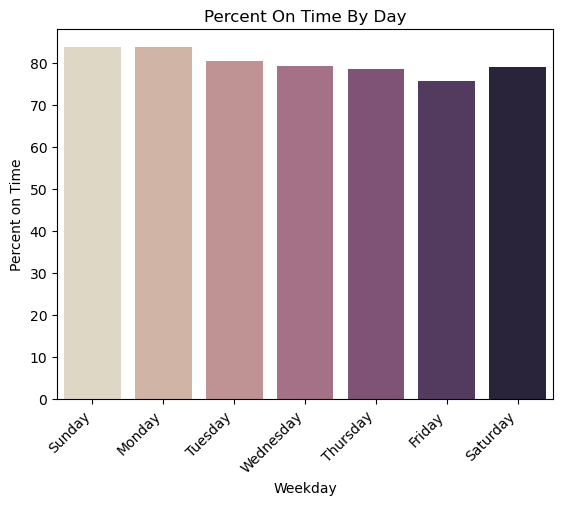

In [153]:
result= ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
sns.barplot(data= wego_day_pct, x='weekday', y= 'ADJUSTED_ONTIME_COUNT',  palette="ch:s=-.2,r=.6", order=result).set_title("Percent On Time By Day")
plt.xlabel('Weekday')
plt.ylabel('Percent on Time')
plt.xticks(rotation=45, ha="right")

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Friday'),
  Text(1, 0, 'Monday'),
  Text(2, 0, 'Saturday'),
  Text(3, 0, 'Sunday'),
  Text(4, 0, 'Thursday'),
  Text(5, 0, 'Tuesday'),
  Text(6, 0, 'Wednesday')])

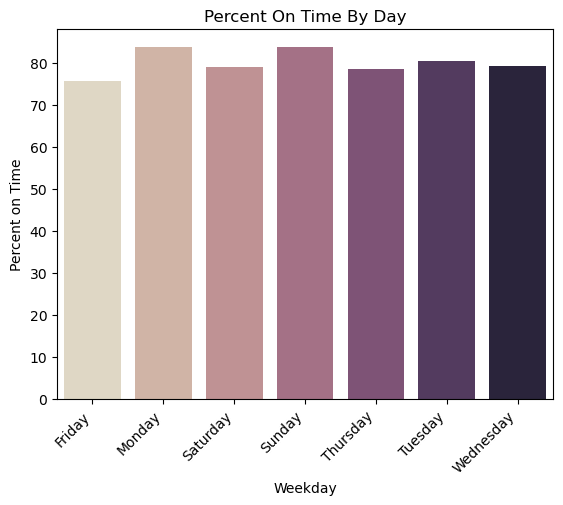

In [154]:
sns.barplot(data= wego_day_pct, x='weekday', y= 'ADJUSTED_ONTIME_COUNT',  palette="ch:s=-.2,r=.6").set_title("Percent On Time By Day")
plt.xlabel('Weekday')
plt.ylabel('Percent on Time')
plt.xticks(rotation=45, ha="right")

### 4. How much of a factor does the driver have on headway and on-time performance? The driver is indicated by the OPERATOR variable.

In [155]:
wego_hour_range['calender_trip_ID'] = wego_hour_range['TRIP_ID'].astype(str) + wego_hour_range['CALENDAR_ID'].astype(str)
wego_hour_range


,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,hour,BUNCH_GAP,HDWY_PCT,Acceptable,day,weekday,calender_trip_ID,Unique_Trips
7,120230801,1,99457897,2023-08-01,Bordeaux,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0,5,Gapping,107.619046,True,5,Tuesday,345106120230801,NaN
8,120230801,1,99457898,2023-08-01,Bordeaux,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,0.000000,NaN,5,Gapping,105.619046,True,5,Tuesday,345106120230801,NaN
9,120230801,1,99457899,2023-08-01,Bordeaux,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0,14.516666,-0.483334,0,0,1,0,0.0,0,0.000000,NaN,5,Bunching,96.777773,True,5,Tuesday,345106120230801,NaN
11,120230801,1,99457901,2023-08-01,Bordeaux,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0,6,Bunching,85.555553,True,6,Tuesday,345107120230801,NaN
12,120230801,1,99457902,2023-08-01,Bordeaux,2200,1040,345107,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 06:25:00,2023-08-01 06:23:30,2023-08-01 06:23:30,1.500000,15.0,11.116666,-3.883334,1,0,0,0,0.0,0,0.000000,NaN,6,Bunching,74.111107,True,6,Tuesday,345107120230801,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350320,120230930,2,100406606,2023-09-30,Hillsboro,702,2312,353447,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 21:45:00,2023-09-30 21:43:52,2023-09-30 21:50:54,-5.900000,30.0,36.716666,6.716666,0,0,1,0,0.0,0,7.033333,NaN,21,Gapping,122.388887,True,21,Saturday,353447120230930,NaN
350323,120230930,2,100406609,2023-09-30,Hillsboro,702,2312,353448,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 22:16:00,2023-09-30 22:22:39,2023-09-30 22:24:37,-8.616666,30.0,34.916666,4.916666,0,1,0,0,0.0,0,1.966666,5.0,22,Gapping,116.388887,True,22,Saturday,353448120230930,NaN
350324,120230930,2,100406610,2023-09-30,Hillsboro,702,2312,353448,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 22:23:00,2023-09-30 22:31:26,2023-09-30 22:31:26,-8.433333,30.0,35.266666,5.266666,0,1,0,0,0.0,0,0.000000,NaN,22,Gapping,117.555553,True,22,Saturday,353448120230930,NaN
350326,120230930,2,100406612,2023-09-30,Hillsboro,702,2312,353449,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 22:45:00,2023-09-30 22:49:19,2023-09-30 22:49:19,-4.316666,30.0,31.866666,1.866666,0,0,1,0,0.0,0,0.000000,NaN,22,Gapping,106.222220,True,22,Saturday,353449120230930,NaN


In [156]:
#df = df[df.column_name != value]
wego_hour_range=wego_hour_range[wego_hour_range["SCHEDULED_HDWY"]!=2]
wego_hour_range.sort_values('SCHEDULED_HDWY', ascending =True)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,hour,BUNCH_GAP,HDWY_PCT,Acceptable,day,weekday,calender_trip_ID,Unique_Trips
263536,120230915,1,99983052,2023-09-15,Murfreesboro Pike,5509,1352,352675,0,TO DOWNTOWN,MXWHARF,6.0,0,36.148860,-86.762226,2023-09-15 07:00:00,2023-09-15 07:11:16,2023-09-15 07:11:16,-11.266666,5.0,2.983333,-2.016667,0,1,0,0,0.0,0,0.000000,NaN,7,Bunching,59.666660,True,7,Friday,352675120230915,NaN
344687,120230929,1,100382858,2023-09-29,Murfreesboro Pike,5592,3124,352730,0,TO DOWNTOWN,MXTHOMP,8.0,1,36.127172,-86.711441,2023-09-29 07:22:00,2023-09-29 07:23:04,2023-09-29 07:25:04,-3.066666,5.0,5.850000,0.850000,0,0,1,0,0.0,0,2.000000,NaN,7,Gapping,117.000000,True,7,Friday,352730120230929,NaN
344685,120230929,1,100382856,2023-09-29,Murfreesboro Pike,5592,3124,352729,0,TO DOWNTOWN,MXWHARF,6.0,0,36.148860,-86.762226,2023-09-29 06:35:00,2023-09-29 06:37:35,2023-09-29 06:37:35,-2.583333,5.0,2.583333,-2.416667,0,0,1,0,0.0,0,0.000000,NaN,6,Bunching,51.666660,True,6,Friday,352729120230929,NaN
344684,120230929,1,100382855,2023-09-29,Murfreesboro Pike,5592,3124,352729,0,TO DOWNTOWN,MXTHOMP,8.0,1,36.127172,-86.711441,2023-09-29 06:23:00,2023-09-29 06:24:36,2023-09-29 06:26:20,-3.333333,5.0,1.216666,-3.783334,0,0,1,0,0.0,0,1.733333,NaN,6,Bunching,24.333320,False,6,Friday,352729120230929,NaN
79023,120230814,1,99828957,2023-08-14,Murfreesboro Pike,5592,907,352729,0,TO DOWNTOWN,MXTHOMP,8.0,1,36.127172,-86.711441,2023-08-14 06:23:00,2023-08-14 06:28:49,2023-08-14 06:28:49,-5.816666,5.0,11.583333,6.583333,0,0,1,0,0.0,0,0.000000,NaN,6,Gapping,231.666660,False,6,Monday,352729120230814,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320378,120230926,1,100279149,2023-09-26,Bordeaux,2202,1222,350138,0,FROM DOWNTOWN,ELIZ,10.0,0,36.195013,-86.837902,2023-09-26 15:54:00,2023-09-26 15:57:33,2023-09-26 15:57:33,-3.550000,503.0,504.683333,1.683333,0,0,1,0,0.0,0,0.000000,NaN,15,Gapping,100.334659,True,15,Tuesday,350138120230926,NaN
313902,120230925,1,100245174,2023-09-25,Bordeaux,2202,1222,350138,0,FROM DOWNTOWN,ELIZ,10.0,0,36.195013,-86.837902,2023-09-25 15:54:00,2023-09-25 15:56:03,2023-09-25 15:56:03,-2.050000,503.0,501.566666,-1.433334,0,0,1,0,0.0,0,0.000000,NaN,15,Bunching,99.715043,True,15,Monday,350138120230925,NaN
239542,120230912,1,100658330,2023-09-12,Bordeaux,2202,1222,350138,0,FROM DOWNTOWN,ELIZ,10.0,0,36.195013,-86.837902,2023-09-12 15:54:00,2023-09-12 16:00:57,2023-09-12 16:00:57,-6.950000,503.0,504.733333,1.733333,0,1,0,0,0.0,0,0.000000,NaN,15,Gapping,100.344599,True,15,Tuesday,350138120230912,NaN
114684,120230821,1,100031959,2023-08-21,Bordeaux,2202,1222,350138,0,FROM DOWNTOWN,ELIZ,10.0,0,36.195013,-86.837902,2023-08-21 15:54:00,2023-08-21 15:56:42,2023-08-21 15:56:42,-2.700000,503.0,503.600000,0.600000,0,0,1,0,0.0,0,0.000000,NaN,15,Gapping,100.119284,True,15,Monday,350138120230821,NaN


In [157]:
#df['Count'] = df.groupby(['Name'])['ID'].transform('count')
grouped_operator = wego_hour_range.groupby('OPERATOR').agg(unique_trips = ('calender_trip_ID', 'count')).reset_index()
grouped_operator

,OPERATOR,unique_trips
0,56,2
1,235,7
2,244,20
3,301,30
4,304,2016
...,...,...
328,3149,56
329,3156,230
330,3165,24
331,3166,29


In [158]:
grouped_operator.sort_values('unique_trips')

,OPERATOR,unique_trips
0,56,2
172,2256,4
193,2377,6
1,235,7
177,2313,8
...,...,...
7,332,1993
194,2399,2005
4,304,2016
34,1133,2156


In [159]:
wego_hour_range['Unique_Trips']= wego_hour_range['calender_trip_ID'].value_counts()
wego_hour_range

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,hour,BUNCH_GAP,HDWY_PCT,Acceptable,day,weekday,calender_trip_ID,Unique_Trips
7,120230801,1,99457897,2023-08-01,Bordeaux,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0,5,Gapping,107.619046,True,5,Tuesday,345106120230801,NaN
8,120230801,1,99457898,2023-08-01,Bordeaux,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,0.000000,NaN,5,Gapping,105.619046,True,5,Tuesday,345106120230801,NaN
9,120230801,1,99457899,2023-08-01,Bordeaux,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0,14.516666,-0.483334,0,0,1,0,0.0,0,0.000000,NaN,5,Bunching,96.777773,True,5,Tuesday,345106120230801,NaN
11,120230801,1,99457901,2023-08-01,Bordeaux,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0,6,Bunching,85.555553,True,6,Tuesday,345107120230801,NaN
12,120230801,1,99457902,2023-08-01,Bordeaux,2200,1040,345107,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 06:25:00,2023-08-01 06:23:30,2023-08-01 06:23:30,1.500000,15.0,11.116666,-3.883334,1,0,0,0,0.0,0,0.000000,NaN,6,Bunching,74.111107,True,6,Tuesday,345107120230801,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350320,120230930,2,100406606,2023-09-30,Hillsboro,702,2312,353447,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 21:45:00,2023-09-30 21:43:52,2023-09-30 21:50:54,-5.900000,30.0,36.716666,6.716666,0,0,1,0,0.0,0,7.033333,NaN,21,Gapping,122.388887,True,21,Saturday,353447120230930,NaN
350323,120230930,2,100406609,2023-09-30,Hillsboro,702,2312,353448,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 22:16:00,2023-09-30 22:22:39,2023-09-30 22:24:37,-8.616666,30.0,34.916666,4.916666,0,1,0,0,0.0,0,1.966666,5.0,22,Gapping,116.388887,True,22,Saturday,353448120230930,NaN
350324,120230930,2,100406610,2023-09-30,Hillsboro,702,2312,353448,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 22:23:00,2023-09-30 22:31:26,2023-09-30 22:31:26,-8.433333,30.0,35.266666,5.266666,0,1,0,0,0.0,0,0.000000,NaN,22,Gapping,117.555553,True,22,Saturday,353448120230930,NaN
350326,120230930,2,100406612,2023-09-30,Hillsboro,702,2312,353449,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 22:45:00,2023-09-30 22:49:19,2023-09-30 22:49:19,-4.316666,30.0,31.866666,1.866666,0,0,1,0,0.0,0,0.000000,NaN,22,Gapping,106.222220,True,22,Saturday,353449120230930,NaN


In [160]:
operators = wego_hour_range['OPERATOR'].value_counts().reset_index().sort_values('count', ascending = True)
operators

,OPERATOR,count
332,56,2
331,2256,4
330,2377,6
329,235,7
328,2313,8
...,...,...
4,332,1993
3,2399,2005
2,304,2016
1,1133,2156


In [161]:
#wego_hour_range[['OPERATOR', 'Unique_Trips','ADJUSTED_EARLY_COUNT','ADJUSTED_LATE_COUNT','ADJUSTED_ONTIME_COUNT','HDWY_PCT']]
grouped_operator = wego_hour_range.groupby('OPERATOR').agg(avg_adherence = ('ADHERENCE', 'mean'), avg_hdwy_perc = 
                                                    ('HDWY_PCT','mean'), unique_trips = 
                                                    ('calender_trip_ID', 'count')).sort_values('unique_trips', ascending = True)

grouped_operator.reset_index()

,OPERATOR,avg_adherence,avg_hdwy_perc,unique_trips
0,56,-1.391667,97.499995,2
1,2256,-0.358333,71.499995,4
2,2377,-3.122222,115.014812,6
3,235,-4.100000,96.656744,7
4,2313,-3.662500,107.069443,8
...,...,...,...,...
328,332,-3.618857,110.571128,1993
329,2399,-2.924247,89.492870,2005
330,304,-3.267245,109.801306,2016
331,1133,-1.567563,97.405430,2156


In [162]:
operator_adherence = grouped_operator.sort_values('avg_adherence', ascending = True)
operator_hdwy = grouped_operator.sort_values('avg_hdwy_perc', ascending = True)

In [163]:
top_10_ad = operator_adherence.head(10)
bot_10_ad = operator_adherence.tail(10)
top_10_hdwy = operator_hdwy.head(10)
bot_10_hdwy = operator_hdwy.tail(10)

In [164]:
top_bot_ad =  pd.concat([top_10_ad, bot_10_ad])
top_bot_hdwy =  pd.concat([top_10_hdwy, bot_10_hdwy])
top_bot_ad.reset_index()
top_bot_hdwy.reset_index()

,OPERATOR,avg_adherence,avg_hdwy_perc,unique_trips
0,2338,-0.918254,60.496471,21
1,2256,-0.358333,71.499995,4
2,1606,0.066667,76.813491,14
3,3127,-6.342708,77.020830,16
4,3166,-2.750000,78.477008,29
5,1730,-0.124704,79.985559,506
6,1706,-0.942793,79.987656,37
7,329,-2.474134,81.866424,1703
8,2675,-0.244254,82.351870,873
9,1717,-0.636437,82.361069,1235


In [166]:
top_bot_ad.reset_index()


,OPERATOR,avg_adherence,avg_hdwy_perc,unique_trips
0,2982,-15.329999,96.751846,15
1,3101,-10.448079,112.044915,1024
2,2400,-10.078723,104.204283,47
3,1016,-9.846111,130.190208,90
4,2137,-9.095555,143.463950,15
5,2309,-8.727604,168.506810,32
6,3096,-8.390305,105.884484,820
7,1904,-8.100052,124.321881,642
8,1922,-7.993775,148.724205,83
9,2312,-7.972858,115.084238,899


In [168]:
# plt.figure(figsize=(12, 6))
# sns.barplot(data=top_bot_ad, x='OPERATOR', y='avg_adherence', color='deeporchid', order=top_bot_ad['OPERATOR')
# plt.title('Average Adherence for Top and Bottom 10 Operators')
# plt.xlabel('Operator')
# plt.ylabel('Average Adherence (minutes)')
# plt.xticks(rotation=45)
# plt.locator_params(axis='y', nbins=10)
# plt.grid(axis='y', linestyle='--')
sns.barplot(data=top_bot_ad, x='OPERATOR', y='avg_adherence', color='deeporchid')


ValueError: Could not interpret input 'OPERATOR'

### 5. Is there any relationship between lateness (ADHERENCE) and headway deviation?

In [204]:
wego_late_adherence = wego[wego['ADHERENCE'] < -6]
wego_late_adherence

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,HDWY_PCT,bunching,gapping,acceptable_range,hdwy_range_status
78,120230801,1,99457968,2023-08-01,Bordeaux,2200,2689,345127,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 17:14:00,2023-08-01 17:20:10,2023-08-01 17:20:10,-6.166666,12.0,16.683333,4.683333,0,1,0,0,0.0,0,0.000000,NaN,139.027775,False,False,True,Acceptable Range
83,120230801,1,99457973,2023-08-01,Bordeaux,2200,2689,345128,0,FROM DOWNTOWN,HPKL,12.0,0,36.218706,-86.834137,2023-08-01 18:06:00,2023-08-01 18:13:16,2023-08-01 18:13:16,-7.266666,49.0,45.016666,-3.983334,0,1,0,0,0.0,0,0.000000,NaN,91.870747,False,False,True,Acceptable Range
91,120230801,1,99457981,2023-08-01,Bordeaux,2200,2689,345131,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 19:35:00,2023-08-01 19:19:31,2023-08-01 19:41:31,-6.516666,50.0,54.166666,4.166666,0,1,0,0,0.0,0,22.000000,19.0,108.333332,False,False,True,Acceptable Range
92,120230801,1,99457982,2023-08-01,Bordeaux,2200,2689,345131,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 19:44:00,2023-08-01 19:50:44,2023-08-01 19:50:44,-6.733333,25.0,30.816666,5.816666,0,1,0,0,0.0,0,0.000000,NaN,123.266664,False,False,True,Acceptable Range
94,120230801,1,99457984,2023-08-01,Bordeaux,2200,2689,345132,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 20:15:00,2023-08-01 20:00:11,2023-08-01 20:22:05,-7.083333,30.0,37.316666,7.316666,0,1,0,0,0.0,0,21.900000,15.0,124.388887,False,False,True,Acceptable Range
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350312,120230930,2,100406598,2023-09-30,Hillsboro,702,2312,353444,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 20:18:00,2023-09-30 20:24:13,2023-09-30 20:24:13,-6.216666,30.0,35.516666,5.516666,0,1,0,0,0.0,0,0.000000,NaN,118.388887,False,False,True,Acceptable Range
350318,120230930,2,100406604,2023-09-30,Hillsboro,702,2312,353446,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 21:23:00,2023-09-30 21:30:00,2023-09-30 21:30:00,-7.000000,28.0,31.566666,3.566666,0,1,0,0,0.0,0,0.000000,NaN,112.738093,False,False,True,Acceptable Range
350323,120230930,2,100406609,2023-09-30,Hillsboro,702,2312,353448,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 22:16:00,2023-09-30 22:22:39,2023-09-30 22:24:37,-8.616666,30.0,34.916666,4.916666,0,1,0,0,0.0,0,1.966666,5.0,116.388887,False,False,True,Acceptable Range
350324,120230930,2,100406610,2023-09-30,Hillsboro,702,2312,353448,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 22:23:00,2023-09-30 22:31:26,2023-09-30 22:31:26,-8.433333,30.0,35.266666,5.266666,0,1,0,0,0.0,0,0.000000,NaN,117.555553,False,False,True,Acceptable Range


Text(0, 0.5, 'Headway Deviation (%)')

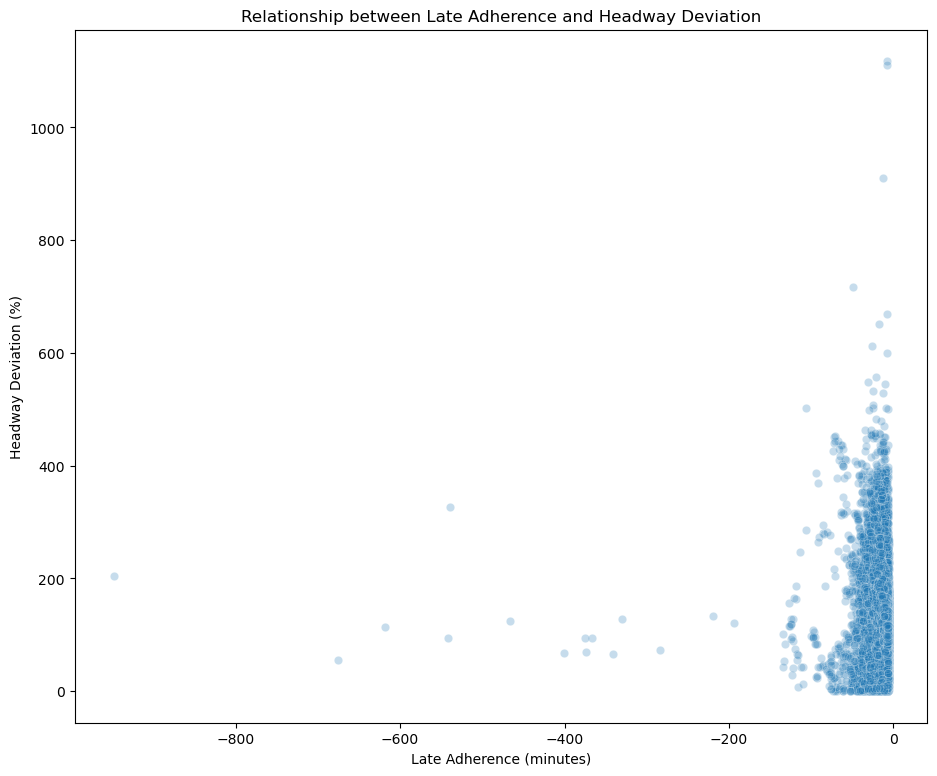

In [207]:
plt.figure(figsize=(11, 9))
sns.scatterplot(data = wego_late_adherence, x = 'ADHERENCE', y = 'HDWY_PCT', alpha = 0.25)
plt.title('Relationship between Late Adherence and Headway Deviation')
plt.xlabel('Late Adherence (minutes)')
plt.ylabel('Headway Deviation (%)')

In [170]:
wego['DATE'].min()

'2023-08-01'

In [171]:
wego['DATE'].max()

'2023-09-30'

### 6. How much impact does being late or too spaced out at the first stop have downstream?  

In [214]:
wego

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,HDWY_PCT,bunching,gapping,acceptable_range,hdwy_range_status
7,120230801,1,99457897,2023-08-01,Bordeaux,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0,107.619046,False,False,True,Acceptable Range
8,120230801,1,99457898,2023-08-01,Bordeaux,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,0.000000,NaN,105.619046,False,False,True,Acceptable Range
9,120230801,1,99457899,2023-08-01,Bordeaux,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0,14.516666,-0.483334,0,0,1,0,0.0,0,0.000000,NaN,96.777773,False,False,True,Acceptable Range
11,120230801,1,99457901,2023-08-01,Bordeaux,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0,85.555553,False,False,True,Acceptable Range
12,120230801,1,99457902,2023-08-01,Bordeaux,2200,1040,345107,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 06:25:00,2023-08-01 06:23:30,2023-08-01 06:23:30,1.500000,15.0,11.116666,-3.883334,1,0,0,0,0.0,0,0.000000,NaN,74.111107,False,False,True,Acceptable Range
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350320,120230930,2,100406606,2023-09-30,Hillsboro,702,2312,353447,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 21:45:00,2023-09-30 21:43:52,2023-09-30 21:50:54,-5.900000,30.0,36.716666,6.716666,0,0,1,0,0.0,0,7.033333,NaN,122.388887,False,False,True,Acceptable Range
350323,120230930,2,100406609,2023-09-30,Hillsboro,702,2312,353448,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 22:16:00,2023-09-30 22:22:39,2023-09-30 22:24:37,-8.616666,30.0,34.916666,4.916666,0,1,0,0,0.0,0,1.966666,5.0,116.388887,False,False,True,Acceptable Range
350324,120230930,2,100406610,2023-09-30,Hillsboro,702,2312,353448,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 22:23:00,2023-09-30 22:31:26,2023-09-30 22:31:26,-8.433333,30.0,35.266666,5.266666,0,1,0,0,0.0,0,0.000000,NaN,117.555553,False,False,True,Acceptable Range
350326,120230930,2,100406612,2023-09-30,Hillsboro,702,2312,353449,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 22:45:00,2023-09-30 22:49:19,2023-09-30 22:49:19,-4.316666,30.0,31.866666,1.866666,0,0,1,0,0.0,0,0.000000,NaN,106.222220,False,False,True,Acceptable Range


In [208]:
wego[['TRIP_EDGE', 'ROUTE_DIRECTION_NAME', 'HDWY_DEV', 'HDWY_PCT', 'acceptable_range', 'ADJUSTED_ONTIME_COUNT']]

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,HDWY_PCT,bunching,gapping,acceptable_range,hdwy_range_status
7,120230801,1,99457897,2023-08-01,Bordeaux,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0,107.619046,False,False,True,Acceptable Range
8,120230801,1,99457898,2023-08-01,Bordeaux,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,0.000000,NaN,105.619046,False,False,True,Acceptable Range
9,120230801,1,99457899,2023-08-01,Bordeaux,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0,14.516666,-0.483334,0,0,1,0,0.0,0,0.000000,NaN,96.777773,False,False,True,Acceptable Range
11,120230801,1,99457901,2023-08-01,Bordeaux,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0,85.555553,False,False,True,Acceptable Range
12,120230801,1,99457902,2023-08-01,Bordeaux,2200,1040,345107,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 06:25:00,2023-08-01 06:23:30,2023-08-01 06:23:30,1.500000,15.0,11.116666,-3.883334,1,0,0,0,0.0,0,0.000000,NaN,74.111107,False,False,True,Acceptable Range
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350320,120230930,2,100406606,2023-09-30,Hillsboro,702,2312,353447,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 21:45:00,2023-09-30 21:43:52,2023-09-30 21:50:54,-5.900000,30.0,36.716666,6.716666,0,0,1,0,0.0,0,7.033333,NaN,122.388887,False,False,True,Acceptable Range
350323,120230930,2,100406609,2023-09-30,Hillsboro,702,2312,353448,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 22:16:00,2023-09-30 22:22:39,2023-09-30 22:24:37,-8.616666,30.0,34.916666,4.916666,0,1,0,0,0.0,0,1.966666,5.0,116.388887,False,False,True,Acceptable Range
350324,120230930,2,100406610,2023-09-30,Hillsboro,702,2312,353448,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 22:23:00,2023-09-30 22:31:26,2023-09-30 22:31:26,-8.433333,30.0,35.266666,5.266666,0,1,0,0,0.0,0,0.000000,NaN,117.555553,False,False,True,Acceptable Range
350326,120230930,2,100406612,2023-09-30,Hillsboro,702,2312,353449,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 22:45:00,2023-09-30 22:49:19,2023-09-30 22:49:19,-4.316666,30.0,31.866666,1.866666,0,0,1,0,0.0,0,0.000000,NaN,106.222220,False,False,True,Acceptable Range


In [276]:
wego_q6= wego[['TRIP_ID','CALENDAR_ID','TRIP_EDGE','ROUTE_STOP_SEQUENCE', 'ROUTE_DIRECTION_NAME', 'HDWY_DEV', 'HDWY_PCT', 'acceptable_range', 'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT','ADJUSTED_ONTIME_COUNT']]

In [277]:
wego_q6 = wego.loc[wego['TRIP_EDGE'] == 1].loc[wego['ADJUSTED_ONTIME_COUNT'] != 1].sort_values('TRIP_ID', ascending=False)

In [278]:
wego_q6[['TRIP_ID','TRIP_EDGE','ROUTE_STOP_SEQUENCE', 'ROUTE_DIRECTION_NAME', 'HDWY_DEV', 'HDWY_PCT', 'acceptable_range', 'ADJUSTED_ONTIME_COUNT']] 

,TRIP_ID,TRIP_EDGE,ROUTE_STOP_SEQUENCE,ROUTE_DIRECTION_NAME,HDWY_DEV,HDWY_PCT,acceptable_range,ADJUSTED_ONTIME_COUNT
127418,354098,1,10.0,TO DOWNTOWN,-1.816667,81.833330,True,0
46641,354098,1,10.0,TO DOWNTOWN,-9.516667,4.833330,False,0
245794,354098,1,10.0,TO DOWNTOWN,5.866666,158.666660,False,0
239279,354098,1,10.0,TO DOWNTOWN,0.716666,107.166660,True,0
252315,354098,1,10.0,TO DOWNTOWN,-3.533334,64.666660,True,0
...,...,...,...,...,...,...,...,...
6613,345220,1,1.0,FROM DOWNTOWN,-3.133334,79.111107,True,0
113,345138,1,1.0,FROM DOWNTOWN,-10.316667,65.611110,True,0
13011,345134,1,1.0,FROM DOWNTOWN,5.266666,115.047617,True,0
94,345132,1,1.0,FROM DOWNTOWN,7.316666,124.388887,True,0


In [279]:
 wego_q6['calender_trip_ID'] =  wego_q6['TRIP_ID'].astype(str) +  wego_q6['CALENDAR_ID'].astype(str)

In [280]:
wego_q6.loc[wego['TRIP_ID'] == 354098][['calender_trip_ID','TRIP_EDGE','ROUTE_STOP_SEQUENCE', 'ROUTE_DIRECTION_NAME', 'HDWY_DEV', 'HDWY_PCT', 'acceptable_range', 'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT','ADJUSTED_ONTIME_COUNT']] 

,calender_trip_ID,TRIP_EDGE,ROUTE_STOP_SEQUENCE,ROUTE_DIRECTION_NAME,HDWY_DEV,HDWY_PCT,acceptable_range,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
127418,354098120230822,1,10.0,TO DOWNTOWN,-1.816667,81.83333,True,1,0,0
46641,354098120230808,1,10.0,TO DOWNTOWN,-9.516667,4.83333,False,1,0,0
245794,354098120230912,1,10.0,TO DOWNTOWN,5.866666,158.66666,False,0,1,0
239279,354098120230911,1,10.0,TO DOWNTOWN,0.716666,107.16666,True,1,0,0
252315,354098120230913,1,10.0,TO DOWNTOWN,-3.533334,64.66666,True,1,0,0
279767,354098120230918,1,10.0,TO DOWNTOWN,-0.100000,99.00000,True,1,0,0


In [281]:
late_start =   wego_q6[( wego_hour_range['ADHERENCE'] < -6) & ( wego_q6['TRIP_EDGE'] == 1)]

C:\Users\ymcmu\AppData\Local\Temp\ipykernel_33904\2370463698.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  late_start =   wego_q6[( wego_hour_range['ADHERENCE'] < -6) & ( wego_q6['TRIP_EDGE'] == 1)]


In [282]:
late_start[['calender_trip_ID','TRIP_EDGE','ROUTE_STOP_SEQUENCE', 'ROUTE_DIRECTION_NAME', 'HDWY_DEV', 'HDWY_PCT', 'acceptable_range', 'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT']] 

,calender_trip_ID,TRIP_EDGE,ROUTE_STOP_SEQUENCE,ROUTE_DIRECTION_NAME,HDWY_DEV,HDWY_PCT,acceptable_range,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
245794,354098120230912,1,10.0,TO DOWNTOWN,5.866666,158.666660,False,0,1,0
87005,353533120230815,1,3.0,FROM DOWNTOWN,9.966666,166.444440,False,0,1,0
100023,353533120230817,1,3.0,FROM DOWNTOWN,5.166666,134.444440,True,0,1,0
133928,353533120230823,1,3.0,FROM DOWNTOWN,10.750000,171.666667,False,0,1,0
299227,353533120230921,1,3.0,FROM DOWNTOWN,8.033333,153.555553,False,0,1,0
...,...,...,...,...,...,...,...,...,...,...
235,345301120230801,1,1.0,FROM DOWNTOWN,7.333333,161.111108,False,0,1,0
188,345230120230801,1,1.0,FROM DOWNTOWN,4.116666,134.305550,True,0,1,0
13011,345134120230803,1,1.0,FROM DOWNTOWN,5.266666,115.047617,True,0,1,0
94,345132120230801,1,1.0,FROM DOWNTOWN,7.316666,124.388887,True,0,1,0


In [283]:
late = wego_q6[wego_q6['calender_trip_ID'].isin(late_start['calender_trip_ID'])]

In [284]:
late = late.groupby('calender_trip_ID').agg({'ADJUSTED_ONTIME_COUNT': 'sum','ADJUSTED_EARLY_COUNT': 'sum','ADJUSTED_LATE_COUNT': 'sum'}).reset_index()

In [285]:
late.head()

,calender_trip_ID,ADJUSTED_ONTIME_COUNT,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT
0,345131120230801,0,0,1
1,345132120230801,0,0,1
2,345134120230803,0,0,1
3,345230120230801,0,0,1
4,345301120230801,0,0,1


In [286]:
late['total_count'] = late['ADJUSTED_ONTIME_COUNT'] + late['ADJUSTED_EARLY_COUNT'] + late['ADJUSTED_LATE_COUNT']
late['late_%'] = late['ADJUSTED_LATE_COUNT'] / late['total_count'] * 100

In [287]:
late.tail()

,calender_trip_ID,ADJUSTED_ONTIME_COUNT,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,total_count,late_%
5751,353533120230831,0,0,1,1,100.0
5752,353533120230908,0,0,1,1,100.0
5753,353533120230911,0,0,1,1,100.0
5754,353533120230921,0,0,1,1,100.0
5755,354098120230912,0,0,1,1,100.0


In [288]:
late_perc = (sum(late['ADJUSTED_LATE_COUNT']) / sum(late['total_count']) * 100)

In [289]:
late_perc

100.0